In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import pytensor.tensor as pt
import arviz as az
import pandas as pd
from pytensor.scan import scan
import pytensor.tensor as at

from scipy import stats
from sklearn.metrics import adjusted_rand_score, jaccard_score

# Generate Synthetic Data

# Model Framework

# Visualizing and Analyzing the Results

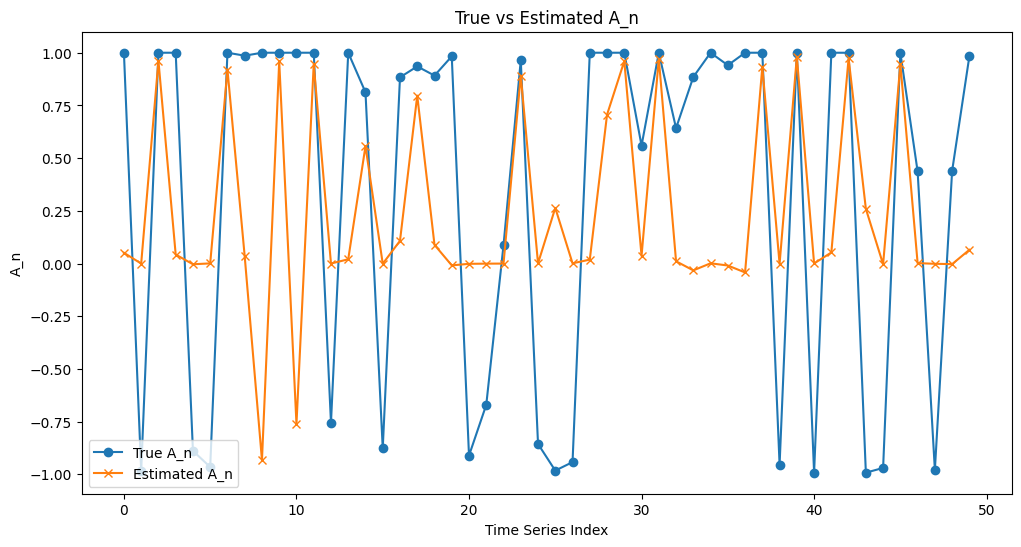

True vs Estimated A_n:
Time Series 1: True A_n = 1.0000, Estimated A_n = 0.0510
Time Series 2: True A_n = -0.9835, Estimated A_n = -0.0003
Time Series 3: True A_n = 1.0000, Estimated A_n = 0.9620
Time Series 4: True A_n = 1.0000, Estimated A_n = 0.0427
Time Series 5: True A_n = -0.8887, Estimated A_n = -0.0034
Time Series 6: True A_n = -0.9652, Estimated A_n = 0.0006
Time Series 7: True A_n = 1.0000, Estimated A_n = 0.9204
Time Series 8: True A_n = 0.9859, Estimated A_n = 0.0340
Time Series 9: True A_n = 1.0000, Estimated A_n = -0.9324
Time Series 10: True A_n = 1.0000, Estimated A_n = 0.9591
Time Series 11: True A_n = 1.0000, Estimated A_n = -0.7609
Time Series 12: True A_n = 1.0000, Estimated A_n = 0.9450
Time Series 13: True A_n = -0.7556, Estimated A_n = 0.0001
Time Series 14: True A_n = 1.0000, Estimated A_n = 0.0201
Time Series 15: True A_n = 0.8124, Estimated A_n = 0.5570
Time Series 16: True A_n = -0.8772, Estimated A_n = -0.0010
Time Series 17: True A_n = 0.8834, Estimated A_n

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract posterior samples
posterior = trace_joint_model.posterior

# Compare true A_n with estimated A_n
A_n_estimated = posterior['A_n'].mean(dim=['chain', 'draw']).values
A_n_true = A_n_true

plt.figure(figsize=(12, 6))
plt.plot(A_n_true, label='True A_n', marker='o')
plt.plot(A_n_estimated, label='Estimated A_n', marker='x')
plt.xlabel('Time Series Index')
plt.ylabel('A_n')
plt.title('True vs Estimated A_n')
plt.legend()
plt.show()


print("True vs Estimated A_n:")
for i in range(len(A_n_true)):
    print(f"Time Series {i+1}: True A_n = {A_n_true[i]:.4f}, Estimated A_n = {A_n_estimated[i]:.4f}")


mae = mean_absolute_error(A_n_true, A_n_estimated)
rmse = np.sqrt(mean_squared_error(A_n_true, A_n_estimated))
print(f"MAE between true and estimated A_n: {mae:.4f}")
print(f"RMSE between true and estimated A_n: {rmse:.4f}")


# Fully joint Model

## Updated Data Generation Process

## 2. Compare Mixture Weights

## 3. Cluster Assignments and ARI

## 4. Compare Latent Features (Z_true vs Z_posterior_mean)

## 5. Posterior Predictive Checks

## 6. Heatmaps of Feature Effects (lambda_A_clusters)

## 7. Cluster-Specific Feature Probabilities

# Generating new data per inferred cluster

# Trying to make clusters visually more distinct

## Data generation process

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
num_clusters = 3

# Create a larger figure with subplots arranged vertically
plt.figure(figsize=(12, 18))  # Increase the height to accommodate vertical subplots

# Loop through each cluster to plot its respective time series
for cluster_id in range(num_clusters):
    # Select the indices of time series that belong to the current cluster
    cluster_indices = np.where(clusters_true == cluster_id)[0]

    # Limit to the first 5 time series in the cluster to avoid clutter
    limited_indices = cluster_indices[:5]

    # Create a subplot for the current cluster (3 rows, 1 column, cluster_id + 1 position)
    plt.subplot(num_clusters, 1, cluster_id + 1)

    # Plot up to 5 time series within the current cluster
    for idx in limited_indices:
        plt.plot(y_obs[idx], alpha=0.7, label=f'TS {idx + 1}')

    plt.xlabel('Time')
    plt.ylabel('Observed Value')
    plt.title(f'Cluster {cluster_id + 1} (n={len(cluster_indices)})')
    plt.grid()

    # Add a legend to show which time series are plotted
    plt.legend(loc='best')

plt.tight_layout()
plt.show()


NameError: name 'clusters_true' is not defined

<Figure size 1200x1800 with 0 Axes>

# Final code stretch

Cluster assignments: [2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1]
Cluster-Specific Feature Probabilities:
 [[0.96022188 0.48926549 0.68212605 0.26808974 0.03584405 0.53231366
  0.36404272 0.48228613 0.91356486 0.51742671 0.95422208 0.21846388
  0.82489084 0.32862826 0.47959225 0.05383275 0.20153638 0.83310551
  0.73700596 0.67637255]
 [0.97228412 0.49632592 0.90836018 0.85340185 0.76960018 0.9834359
  0.97939834 0.76513108 0.44393572 0.55412657 0.66624626 0.76980595
  0.98863611 0.67941589 0.82794344 0.77984939 0.5812421  0.82222651
  0.97750613 0.88185241]
 [0.85629301 0.86051231 0.40841725 0.95529386 0.95644157 0.72740983
  0.68171956 0.82722218 0.70612075 0.96669973 0.45654913 0.98880351
  0.63215008 0.92606034 0.95539628 0.79426237 0.94140386 0.80634589
  0.8215187  0.99242542]]
Generated Z_true with shape: (50, 20)
Cluster-Specific Feature Effects for A_n (lambda_A_clusters_true):
 [[-0.07932775 -0.59332076 -0.18510471  0.0

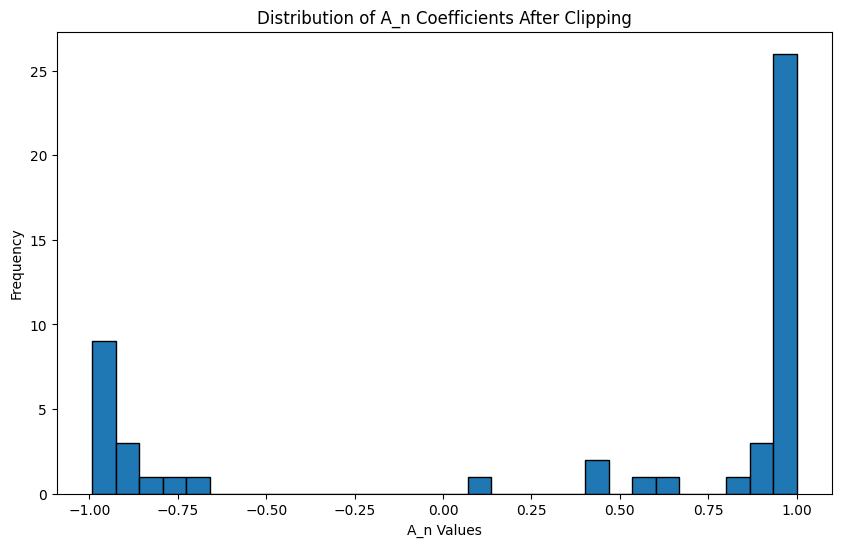

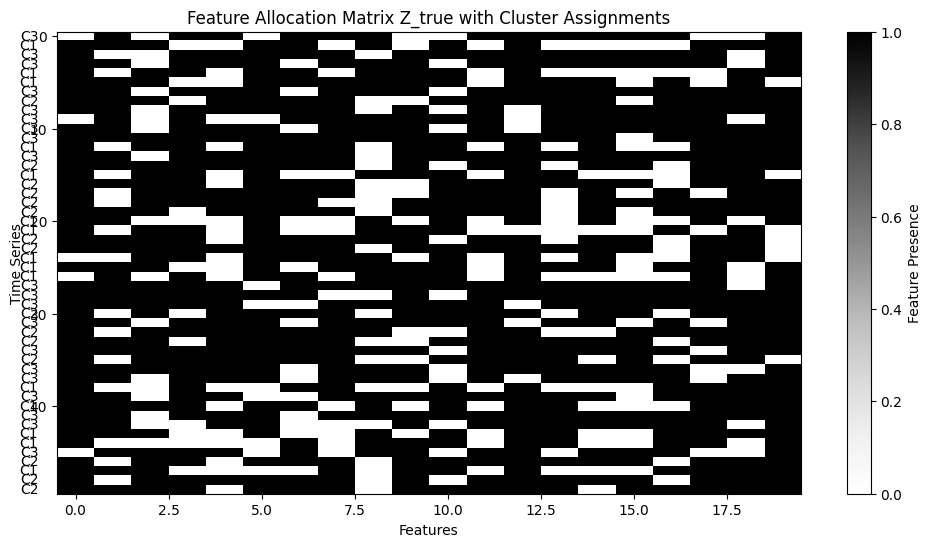

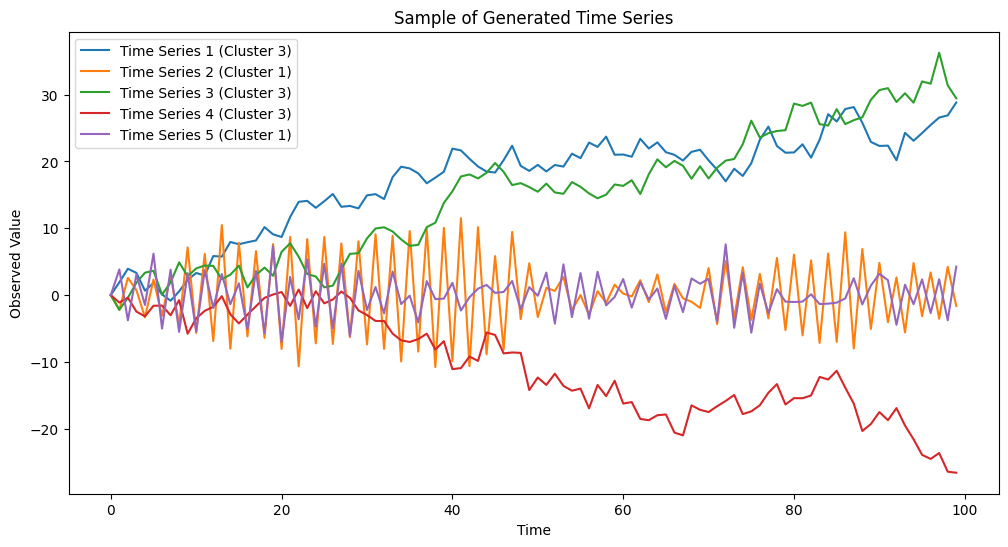

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N = 50          # Number of time series
T = 100         # Number of time steps
#alpha = 2.0     # IBP hyperparameter (direct influence)
tau_A = 0.5     # Standard deviation for feature effects
tau_C = 0.5
sigma_A = 0.05  # Parameter noise
sigma_C = 0.05
Q_true = 0.5    # Process noise variance
R_true = 0.5    # Observation noise variance
C_true = 2.0    # Observation coefficient
K_trunc = 20    # Truncation level for IBP
num_clusters = 3  # Number of clusters

# Assign each time series to a cluster
clusters_true = np.random.choice(num_clusters, size=N)
print("Cluster assignments:", clusters_true)

# Define Cluster-Specific Feature Probabilities
#alpha_clusters = [2.0, 5.0, 1.0]  # Different alpha parameters for each cluster
#beta_clusters = [5.0, 2.0, 1.0]   # Different beta parameters for each cluster
alpha_clusters = [1.0, 3.0, 5.0]

# Generate cluster-specific feature probabilities
'''feature_probs_clusters_true = np.array([
    np.random.beta(a, b, size=K_trunc)
    for a, b in zip(alpha_clusters, beta_clusters)
])'''

feature_probs_clusters_true = np.array([
    np.random.beta(a, 1.0, size=K_trunc)
    for a in alpha_clusters
])

print("Cluster-Specific Feature Probabilities:\n", feature_probs_clusters_true)

def generate_ibp_with_distinct_clusters(N, clusters, feature_probs_clusters, K_trunc):
    """
    Generates a binary feature matrix Z using the Indian Buffet Process,
    incorporating cluster-specific feature probabilities.

    Parameters:
    - N (int): Number of time series (customers).
    - clusters (numpy.ndarray): Cluster assignments for each time series.
    - feature_probs_clusters (numpy.ndarray): Feature probabilities per cluster (num_clusters, K_trunc).
    - K_trunc (int): Truncation level for IBP.

    Returns:
    - Z (numpy.ndarray): Binary feature allocation matrix of shape (N, K_trunc).
    """
    Z = np.zeros((N, K_trunc))  # Initialize with zeros

    for n in range(N):
        cluster_id = clusters[n]
        for k in range(K_trunc):
            # Feature activation probability based on cluster
            p = feature_probs_clusters[cluster_id, k]
            Z[n, k] = np.random.binomial(1, p)

    return Z

# Generate Z_true based on cluster-specific feature probabilities
Z_true = generate_ibp_with_distinct_clusters(N, clusters_true, feature_probs_clusters_true, K_trunc)
print(f"Generated Z_true with shape: {Z_true.shape}")

# --- Generate cluster-specific feature effects ---
# For A_n
lambda_A_clusters_true = np.random.normal(0, tau_A, size=(num_clusters, K_trunc))
print("Cluster-Specific Feature Effects for A_n (lambda_A_clusters_true):\n", lambda_A_clusters_true)

# Assign feature effects based on clusters
lambda_A = lambda_A_clusters_true[clusters_true]  # Shape: (N, K_trunc)

# Compute A_n_true with element-wise multiplication and summation
epsilon_A = np.random.normal(0, sigma_A, size=N)
A_n_true = (Z_true * lambda_A).sum(axis=1) + epsilon_A
A_n_true = np.tanh(A_n_true)  # Ensures stability
print(f"Computed A_n_true with shape: {A_n_true.shape}")

# Verify A_n_true distribution
plt.figure(figsize=(10, 6))
plt.hist(A_n_true, bins=30, edgecolor='k')
plt.xlabel('A_n Values')
plt.ylabel('Frequency')
plt.title('Distribution of A_n Coefficients After Clipping')
plt.show()

# Generate time series data
x_true = np.zeros((N, T))
y_obs = np.zeros((N, T))

# Initial state
x_true[:, 0] = np.random.normal(0, 1, size=N)

# Simulate each time series
for t in range(1, T):
    # State equation
    x_true[:, t] = A_n_true * x_true[:, t - 1] + np.random.normal(0, np.sqrt(Q_true), size=N)
    # Observation equation
    y_obs[:, t] = C_true * x_true[:, t] + np.random.normal(0, np.sqrt(R_true), size=N)

# Plot feature allocation matrix with cluster annotations
plt.figure(figsize=(12, 6))
plt.imshow(Z_true, aspect='auto', cmap='Greys', interpolation='none')
plt.xlabel('Features')
plt.ylabel('Time Series')
plt.title('Feature Allocation Matrix Z_true with Cluster Assignments')
plt.colorbar(label='Feature Presence')
for i in range(N):
    plt.text(-1, i, f"C{clusters_true[i]+1}", va='center', ha='right')
plt.show()

# Plot some of the generated time series
plt.figure(figsize=(12, 6))
for i in range(min(N, 5)):
    plt.plot(y_obs[i], label=f'Time Series {i+1} (Cluster {clusters_true[i]+1})')
plt.xlabel('Time')
plt.ylabel('Observed Value')
plt.title('Sample of Generated Time Series')
plt.legend()
plt.show()


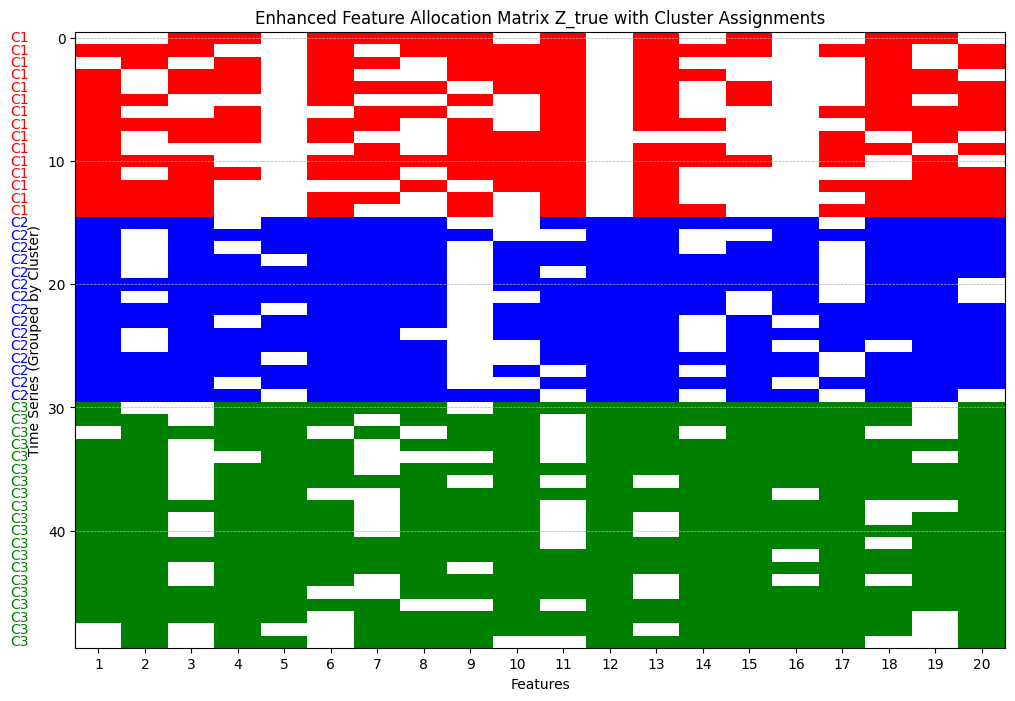


Sorted Z_true Matrix with Cluster Assignments:
Time Series 1 (Cluster 1): [0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
Time Series 2 (Cluster 1): [1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
Time Series 3 (Cluster 1): [0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
Time Series 4 (Cluster 1): [1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
Time Series 5 (Cluster 1): [1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
Time Series 6 (Cluster 1): [1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
Time Series 7 (Cluster 1): [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.]
Time Series 8 (Cluster 1): [1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.]
Time Series 9 (Cluster 1): [1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
Time Series 10 (Cluster 1): [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]
Time Series 11 (Cluster 1): [1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.

In [3]:
import matplotlib.colors as mcolors

# --- Visual Enhancement: Group Time Series by Cluster ---
# Sort indices based on cluster assignments for better visualization
sorted_indices = np.argsort(clusters_true)
Z_true_sorted = Z_true[sorted_indices]
clusters_sorted = clusters_true[sorted_indices]

# Assign distinct colors to each cluster
cluster_colors = ['red', 'blue', 'green']  # Distinct colors for each cluster
color_map = mcolors.ListedColormap(['white'] + cluster_colors)  # White for 0, cluster colors for activated features

# Create an array of colors matching the activation states and cluster colors
activation_colors = np.zeros(Z_true_sorted.shape, dtype=int)

for i, cluster_id in enumerate(clusters_sorted):
    # For activated features (Z=1), assign the color corresponding to the cluster
    activation_colors[i, Z_true_sorted[i] == 1] = cluster_id + 1  # `+1` to match with colormap indexing

# Plot feature allocation matrix with cluster annotations and activation coloring
plt.figure(figsize=(12, 8))
plt.imshow(activation_colors, aspect='auto', cmap=color_map, interpolation='none')

# Add x-ticks to properly represent feature indices
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

# Add colored annotations for clusters on the left-hand side
for i in range(N):
    cluster_label = f"C{clusters_sorted[i] + 1}"
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_colors[clusters_sorted[i]], fontsize=10)

plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by Cluster)')
plt.title('Enhanced Feature Allocation Matrix Z_true with Cluster Assignments')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

# --- Print the Sorted Z_true Matrix for Interpretation ---
print("\nSorted Z_true Matrix with Cluster Assignments:")
for i, (cluster_id, z_row) in enumerate(zip(clusters_sorted, Z_true_sorted)):
    print(f"Time Series {i + 1} (Cluster {cluster_id + 1}): {z_row}")


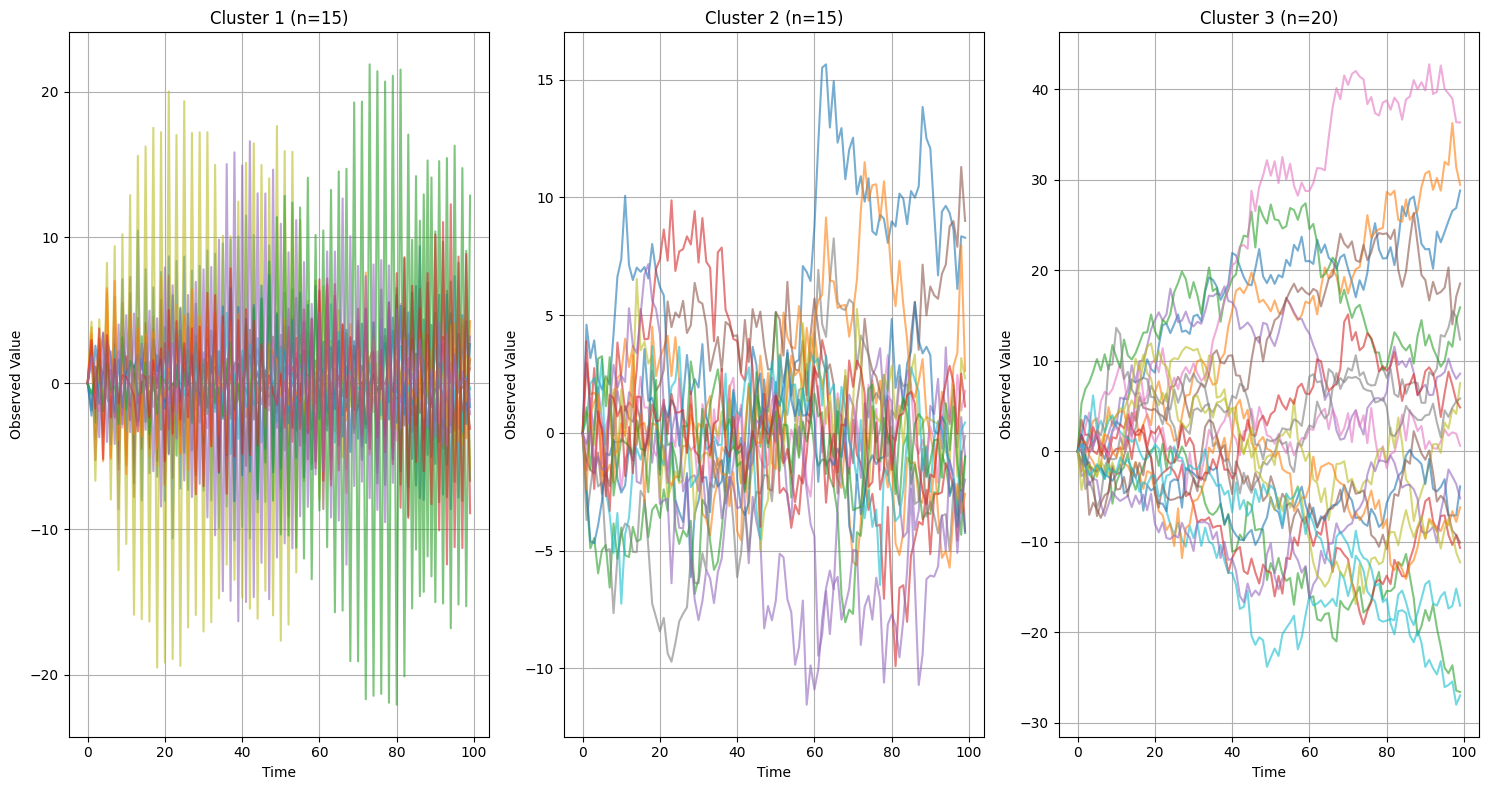

In [4]:
# Number of clusters
num_clusters = 3

# Create subplots for each cluster to visualize their respective time series
plt.figure(figsize=(15, 8))

for cluster_id in range(num_clusters):
    # Select the time series that belong to the current cluster
    cluster_indices = np.where(clusters_true == cluster_id)[0]

    plt.subplot(1, num_clusters, cluster_id + 1)

    # Plot time series within the current cluster
    for idx in cluster_indices:
        plt.plot(y_obs[idx], alpha=0.6, label=f'TS {idx + 1}' if len(cluster_indices) <= 3 else None)

    plt.xlabel('Time')
    plt.ylabel('Observed Value')
    plt.title(f'Cluster {cluster_id + 1} (n={len(cluster_indices)})')
    plt.grid()

    # Add legend only if there are a small number of time series to keep the plot clear
    if len(cluster_indices) <= 3:
        plt.legend(loc='best')

plt.tight_layout()
plt.show()


Sampling 2 chains, 1,355 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 6:05:31

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
ERROR:pymc.stats.convergence:There were 1355 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


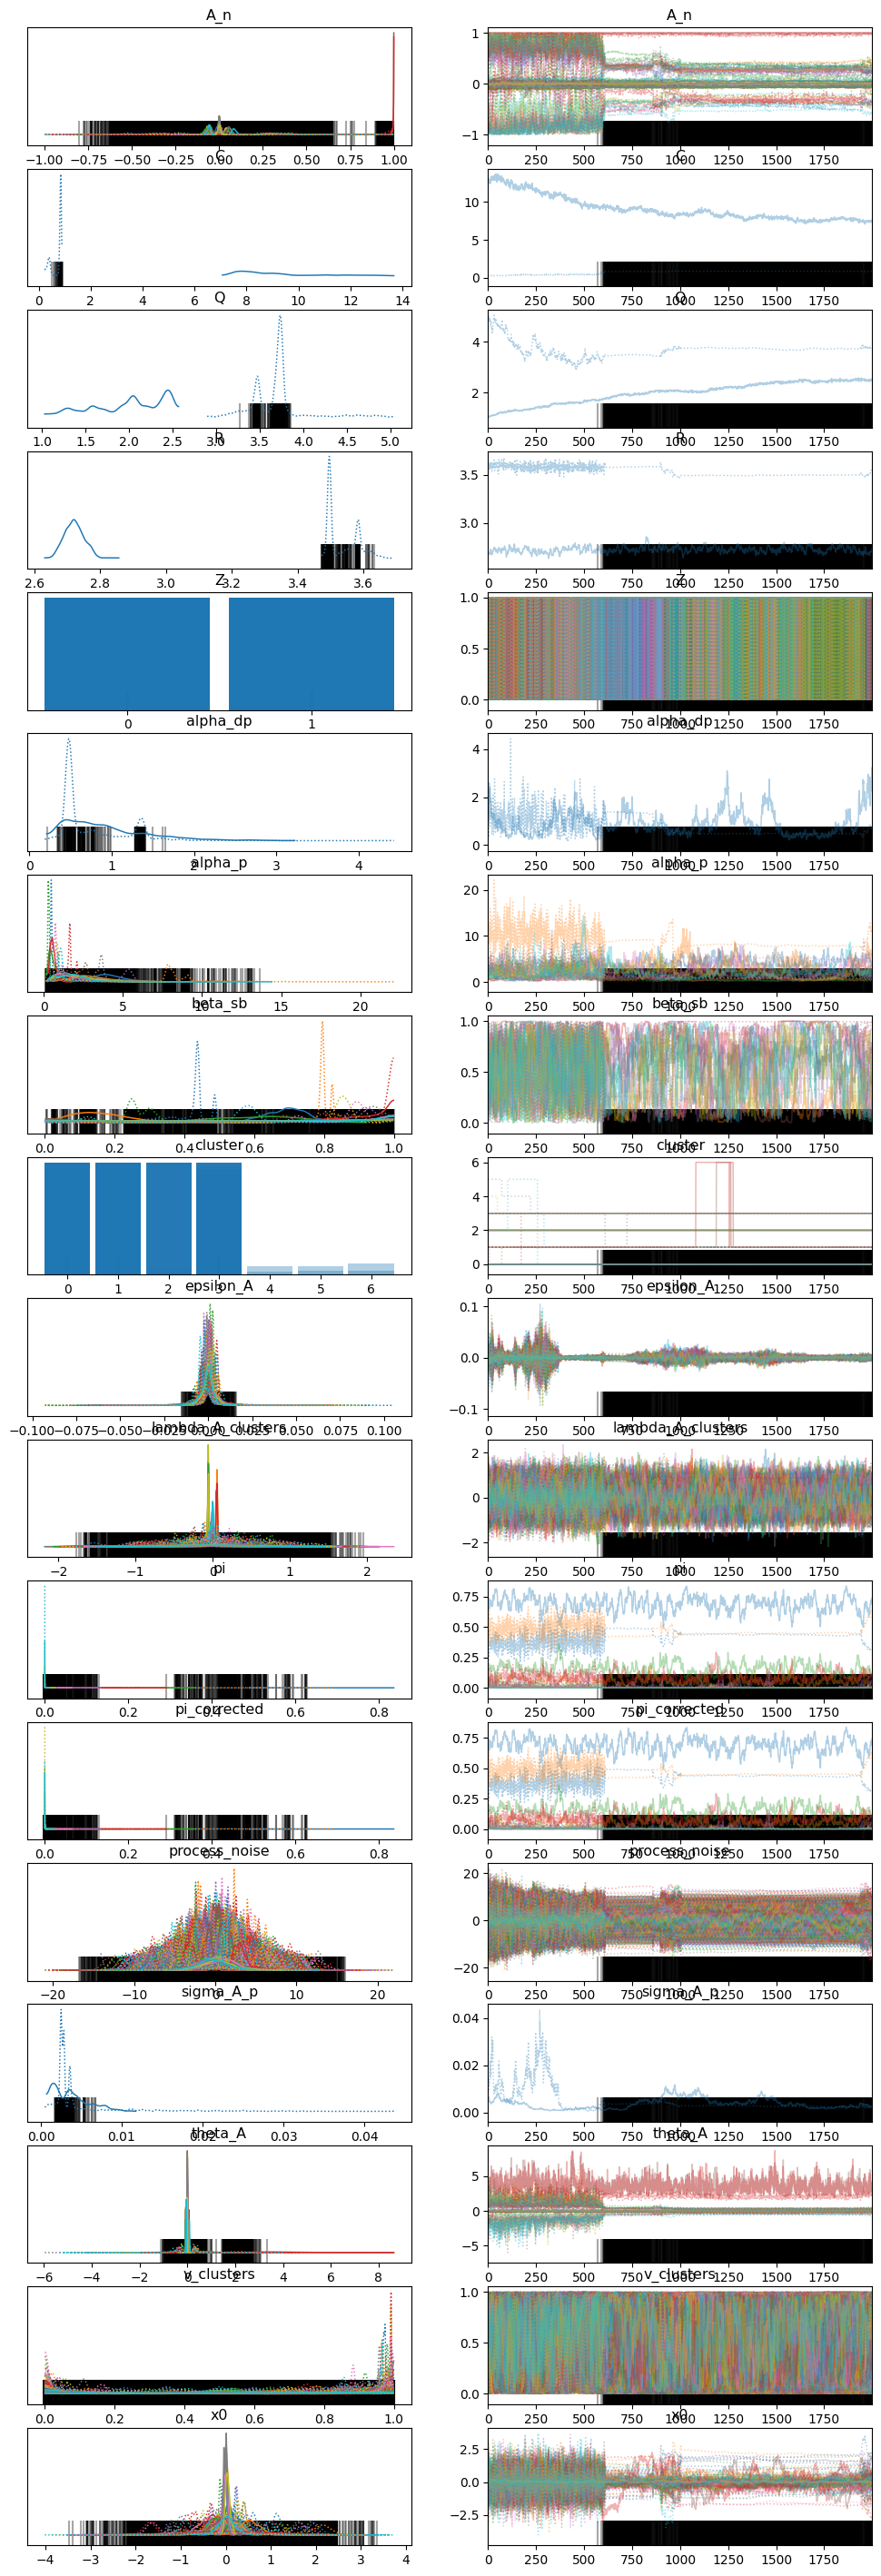

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (be

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
A_n[0] -0.301  0.275  -0.860   -0.038      0.177    0.144       3.0      12.0   
A_n[1]  0.004  0.022  -0.022    0.037      0.004    0.003      18.0      22.0   
A_n[2]  0.236  0.320  -0.100    0.774      0.221    0.185       2.0      11.0   
A_n[3] -0.287  0.257  -0.796   -0.040      0.172    0.142       2.0      12.0   
A_n[4]  0.002  0.016  -0.028    0.025      0.001    0.002      45.0      17.0   
...       ...    ...     ...      ...        ...      ...       ...       ...   
x0[45] -0.032  0.573  -0.727    1.411      0.097    0.197      47.0      13.0   
x0[46] -0.073  0.417  -1.258    0.311      0.093    0.122      19.0      15.0   
x0[47] -0.243  0.450  -1.151    0.356      0.192    0.145       7.0      12.0   
x0[48]  0.148  0.353  -0.726    0.679      0.090    0.074       7.0      13.0   
x0[49]  0.088  0.548  -0.896    1.054      0.064    0.144      19.0      13.0   

        r_hat  
A_n[0]   1.

In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
import pytensor.tensor as at
from pytensor import scan

# Parameters
N = 50          # Number of time series
T = 100         # Number of time steps
#alpha = 1.0     # IBP hyperparameter
#tau_A = 1.0    # Standard deviation for feature effects
sigma_A = 0.05  # Parameter noise
Q_true = 0.5    # Process noise variance
R_true = 0.5    # Observation noise variance
C_true = 2.0    # Observation coefficient
K_trunc = 20    # Truncation level for IBP
K_max = 10      # Upper bound for clusters in stick-breaking

# Assuming y_obs, N, T, K_trunc, num_clusters are defined as per data generation
# y_obs: (N, T)

with pm.Model() as joint_model:
    # --- 1. Dirichlet Process Mixture Model (DPMM) using Stick-Breaking ---
    # Concentration parameter for DP (CRP equivalent)
    alpha_dp = pm.Gamma('alpha_dp', alpha=1.0, beta=1.0)

    # Stick-breaking weights
    beta_sb = pm.Beta('beta_sb', alpha=1.0, beta=alpha_dp, shape=K_max)

    # Compute the remaining stick for each cluster
    stick_remaining = at.concatenate([at.ones(1), at.extra_ops.cumprod(1 - beta_sb[:-1])])

    # Compute mixture weights pi[k] = beta_sb[k] * stick_remaining[k]
    pi = pm.Deterministic('pi', beta_sb * stick_remaining)

    # Ensure that pi sums to 1 by absorbing the remaining stick into the last cluster
    remaining_stick = at.prod(1 - beta_sb)
    pi_corrected = at.set_subtensor(pi[-1], pi[-1] + remaining_stick)
    pi_corrected = pm.Deterministic('pi_corrected', pi_corrected)

    # Cluster assignments
    cluster = pm.Categorical('cluster', p=pi_corrected, shape=N)

    # --- 2. IBP for Latent Feature Allocation ---
    # IBP Hyperparameters
    alpha_p = pm.Gamma('alpha_p', alpha=2.0, beta=1, shape=K_max)
    beta_p = 1 #pm.Gamma('beta_p', alpha=2.0, beta=1.0, shape=K_max)

    scaled_alpha_p = alpha_p #/ K_trunc
    # Cluster-specific feature probabilities with cluster-specific alphas and betas
    feature_probabilities_clusters = pm.Beta('v_clusters',
        alpha=scaled_alpha_p[:, None],  # Shape: (K_max, 1)
        beta=beta_p,    # Scalar beta=1.0
        shape=(K_max, K_trunc)
    )

    # Assign feature probabilities based on cluster
    feature_probs = feature_probabilities_clusters[cluster]  # Shape: (N, K_trunc)

    # Latent Feature Matrix Z with cluster-dependent probabilities
    Z = pm.Bernoulli('Z', p=feature_probs, shape=(N, K_trunc))

    # --- 3. Cluster-Specific Feature Effects ---
    lambda_A_clusters = pm.Normal('lambda_A_clusters', mu=0, sigma=0.5,
                                  shape=(K_max, K_trunc))

    # --- 4. Noise Terms for Parameter Dynamics ---
    sigma_A_p = pm.HalfNormal('sigma_A_p', sigma=0.05)
    epsilon_A = pm.Normal('epsilon_A', mu=0, sigma=sigma_A_p, shape=N)

    # --- 5. Computing theta_A and A_n ---
    theta_A = pm.Deterministic('theta_A',
        (Z * lambda_A_clusters[cluster]).sum(axis=1) + epsilon_A)
    A_n = pm.Deterministic('A_n', at.tanh(theta_A))

    # --- 6. Sampling Parameters ---
    C = pm.TruncatedNormal('C', mu=2.0, sigma=1.0, lower=0)
    Q = pm.HalfNormal('Q', sigma=1.0)
    R = pm.HalfNormal('R', sigma=1.0)

    # --- 7. Initial States ---
    x0 = pm.Normal('x0', mu=0, sigma=1.0, shape=N)

    # --- 8. State-Space Model ---
    def state_equation(x_prev, noise_t, A_n):
        return A_n * x_prev + noise_t

    process_noise = pm.Normal('process_noise', mu=0, sigma=Q, shape=(T, N))

    x_states, _ = scan(
        fn=state_equation,
        sequences=process_noise,
        outputs_info=x0,
        non_sequences=A_n,
        n_steps=T
    )

    # --- 9. Observation Equations and Likelihood ---
    y_estimated = C * x_states
    y_estimated = y_estimated.T  # Shape: (N, T)

    Y_obs_model = pm.Normal('Y_obs', mu=y_estimated, sigma=R, observed=y_obs)

    # --- 10. Inference ---
    trace_joint_model = pm.sample(
        draws=2000,
        tune=2000,
        chains=2,
        cores=2,
        target_accept=0.95,
        return_inferencedata=True
    )

# --- 11. Diagnostics ---
az.plot_trace(trace_joint_model)
plt.show()

summary = az.summary(trace_joint_model)
print(summary)

In [5]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')


# Define the directory path in Google Drive
drive_path = '/content/drive/MyDrive/Research_Project/Project_Data'

# Create the directory if it doesn't exist
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Define file paths
trace_path = os.path.join(drive_path, 'joint_model_trace_tanh_final_with_correct_data_gen_2_chains.nc')
data_path = os.path.join(drive_path, 'time_series_data.npy')
model_summary_path = os.path.join(drive_path, 'model_summary.txt')

Mounted at /content/drive


In [ ]:
# Save the trace to Google Drive as a NetCDF file
az.to_netcdf(trace_joint_model, trace_path)

print(f"Trace saved to {trace_path}")

In [6]:
# Load the trace from the saved NetCDF file
trace_joint_model = az.from_netcdf(trace_path)

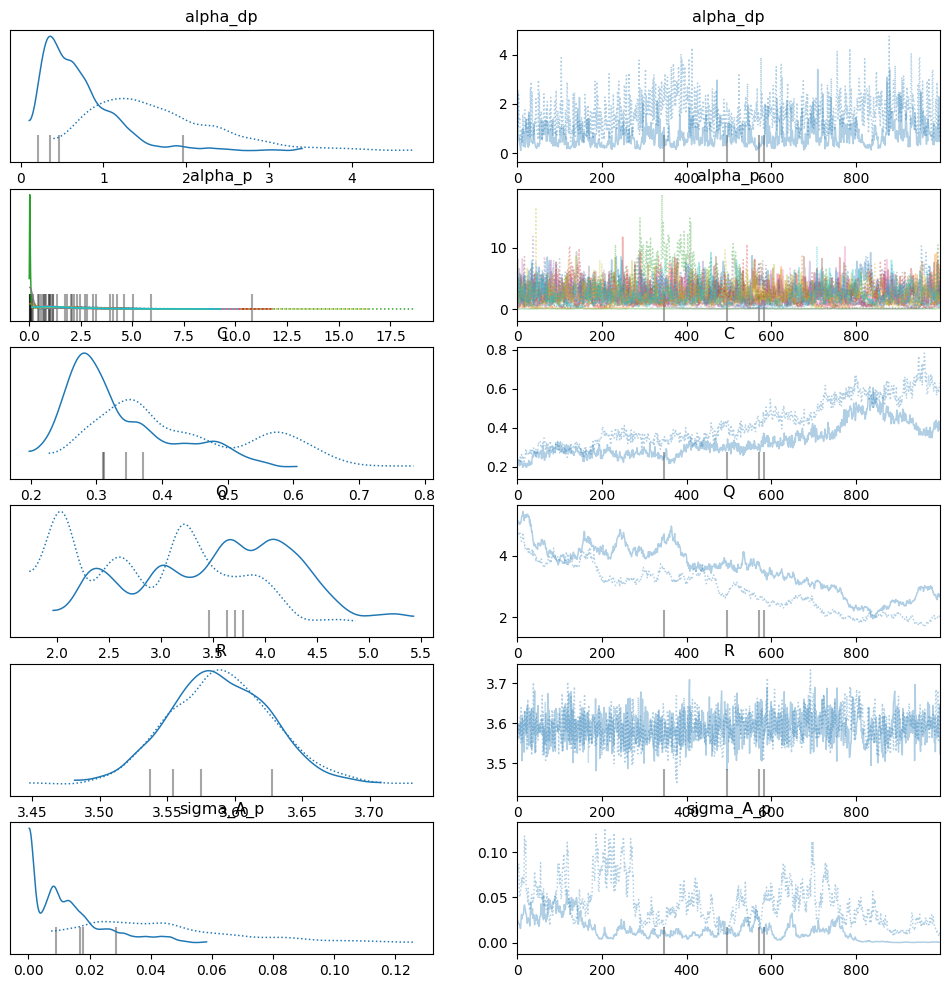

             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_dp    1.157  0.757   0.165    2.554      0.353    0.268       4.0   
alpha_p[0]  3.029  1.440   0.876    5.837      0.151    0.107      73.0   
alpha_p[1]  1.662  1.365   0.058    4.257      0.253    0.180      15.0   
alpha_p[2]  1.752  2.515   0.010    6.619      1.325    1.025       3.0   
alpha_p[3]  2.226  1.471   0.261    4.992      0.156    0.111      68.0   
alpha_p[4]  1.883  1.358   0.117    4.349      0.297    0.213      24.0   
alpha_p[5]  1.783  1.476   0.083    4.436      0.333    0.239       8.0   
alpha_p[6]  1.869  1.327   0.176    4.412      0.092    0.065     127.0   
alpha_p[7]  1.618  1.561   0.032    4.385      0.669    0.501       4.0   
alpha_p[8]  2.103  1.398   0.244    4.658      0.085    0.060     195.0   
alpha_p[9]  1.838  1.424   0.116    4.514      0.146    0.103      38.0   
C           0.379  0.112   0.227    0.608      0.067    0.054       3.0   
Q           3.233  0.821 

In [ ]:
# Trace plots
az.plot_trace(trace_joint_model, var_names=['alpha_dp', 'alpha_p', 'C', 'Q', 'R', 'sigma_A_p'])
plt.show()

# Summary statistics
summary_crp = az.summary(trace_joint_model, var_names=['alpha_dp', 'alpha_p', 'C', 'Q', 'R', 'sigma_A_p'])
print(summary_crp)

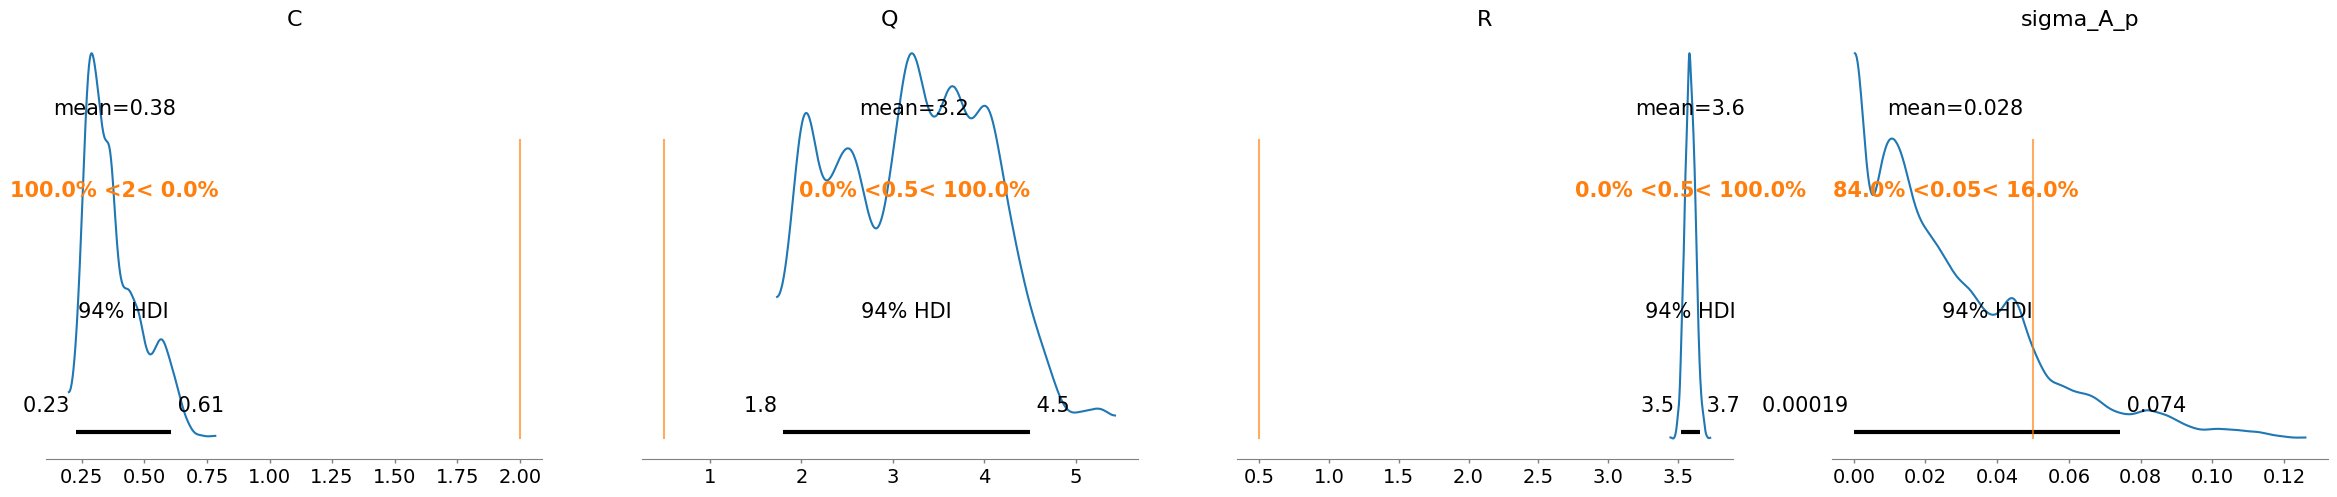

In [ ]:
import arviz as az

sigma_A_true = 0.05

# Plot posterior distributions with true values
az.plot_posterior(
    trace_joint_model,
    var_names=['C', 'Q', 'R', 'sigma_A_p', ],
    ref_val=[C_true, Q_true, R_true, sigma_A_true]
)
plt.show()

# Compute and display posterior statistics
posterior_stats = az.summary(
    trace_joint_model,
    var_names=['C', 'Q', 'R', 'sigma_A_p'],
    hdi_prob=0.94  # 94% credible interval (default is 94%)
)

# Print the posterior statistics
print(posterior_stats)

In [ ]:
import arviz as az

# Extract numerical summaries for the posterior distributions
posterior_summary = az.summary(trace_joint_model, var_names=['C', 'Q', 'R', 'sigma_A_p'])

# Print the summary
print(posterior_summary)


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
C          0.379  0.112   0.227    0.608      0.067    0.054       3.0   
Q          3.233  0.821   1.804    4.499      0.508    0.409       3.0   
R          3.590  0.038   3.521    3.660      0.002    0.001     336.0   
sigma_A_p  0.028  0.024   0.000    0.074      0.012    0.009       4.0   

           ess_tail  r_hat  
C              12.0   1.93  
Q              15.0   2.00  
R             729.0   1.02  
sigma_A_p      11.0   1.54  


Inferred Mixture Weights (pi_corrected):
  Cluster 1: 0.3649
  Cluster 2: 0.1537
  Cluster 3: 0.2734
  Cluster 4: 0.0613
  Cluster 5: 0.0865
  Cluster 6: 0.0335
  Cluster 7: 0.0102
  Cluster 8: 0.0058
  Cluster 9: 0.0042
  Cluster 10: 0.0066


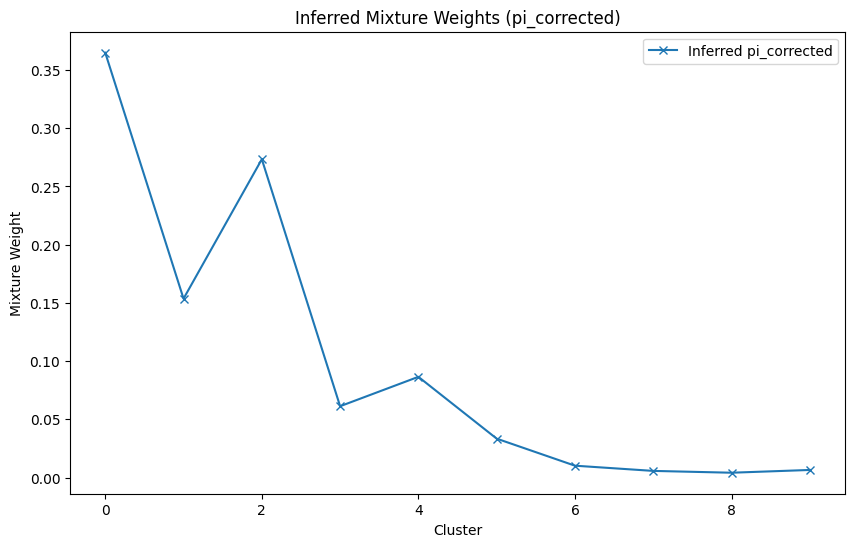

In [ ]:
# Extract posterior mean of the mixture weights (pi_corrected)
pi_corrected_estimated = trace_joint_model.posterior['pi_corrected'].mean(dim=['chain', 'draw']).values

# Print the estimated mixture weights for each cluster
num_clusters = len(pi_corrected_estimated)
print("Inferred Mixture Weights (pi_corrected):")
for cluster_idx in range(num_clusters):
    print(f"  Cluster {cluster_idx + 1}: {pi_corrected_estimated[cluster_idx]:.4f}")

# Plot the mixture weights
plt.figure(figsize=(10, 6))
plt.plot(pi_corrected_estimated, label='Inferred pi_corrected', marker='x')
plt.xlabel('Cluster')
plt.ylabel('Mixture Weight')
plt.title('Inferred Mixture Weights (pi_corrected)')
plt.legend()
plt.show()


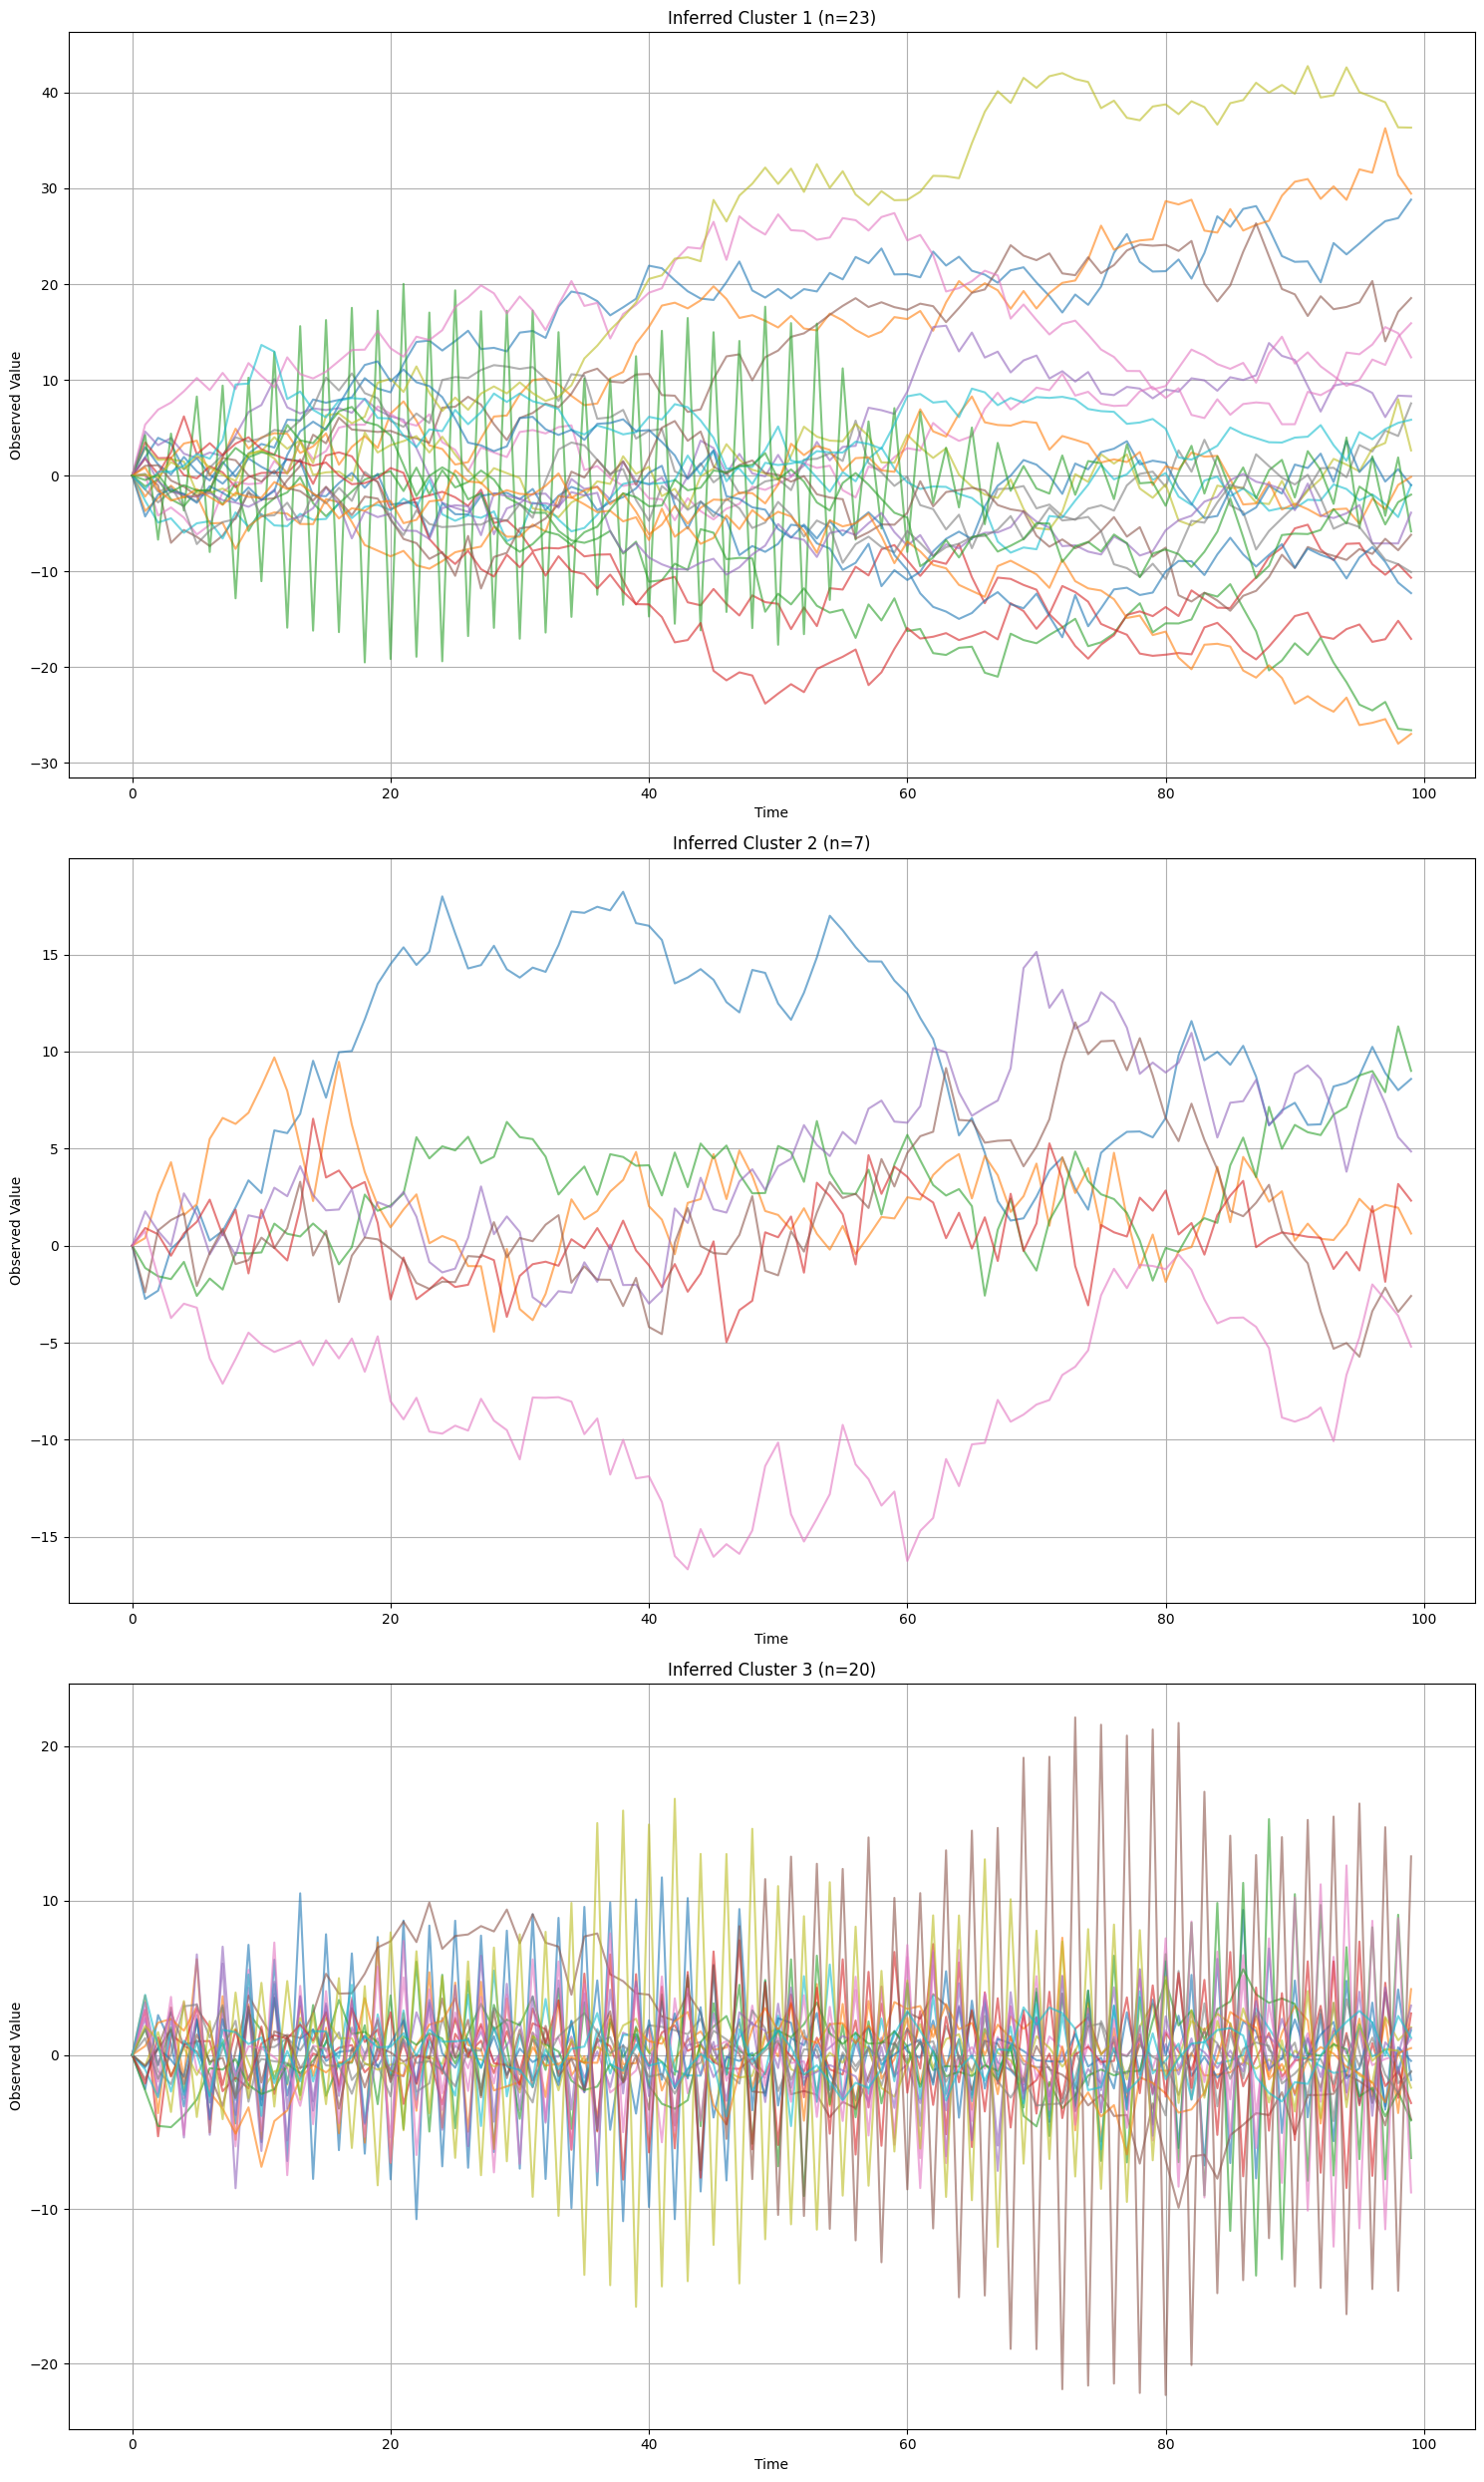

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
inferred_num_clusters = inferred_clusters.max() + 1  # Determine number of inferred clusters

# Set figure size to make each cluster more visually distinct, and create subplots for inferred clusters
plt.figure(figsize=(15, 25))

for cluster_id in range(inferred_num_clusters):
    # Select the time series that belong to the current inferred cluster
    cluster_indices = np.where(inferred_clusters == cluster_id)[0]

    # Plot time series in separate subplots for each cluster
    plt.subplot(inferred_num_clusters, 1, cluster_id + 1)

    # Plot time series within the current inferred cluster
    for idx in cluster_indices[:]:  # Only plot up to 5 time series to avoid clutter
        plt.plot(y_obs[idx], alpha=0.6, label=f'TS {idx + 1}' if len(cluster_indices) <= 5 else None)

    plt.xlabel('Time')
    plt.ylabel('Observed Value')
    plt.title(f'Inferred Cluster {cluster_id + 1} (n={len(cluster_indices)})')
    plt.grid()

    # Add legend if the number of time series is small
    if len(cluster_indices) <= 5:
        plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [7]:
from scipy import stats

# Extract posterior samples for cluster assignments
inferred_clusters_samples = trace_joint_model.posterior['cluster'].values

# Check the shape of the inferred_clusters_samples
print(f"Inferred clusters samples shape: {inferred_clusters_samples.shape}")

# Reshape samples to have shape (num_samples, num_series)
num_chains, num_draws, num_series = inferred_clusters_samples.shape
reshaped_clusters = inferred_clusters_samples.reshape(num_chains * num_draws, num_series)

# Compute mode for each time series to determine inferred cluster assignment
inferred_clusters = stats.mode(reshaped_clusters, axis=0).mode.flatten().astype(int)

# Verify the range of inferred_clusters
print(f"Inferred clusters range: {inferred_clusters.min()} to {inferred_clusters.max()}")

# Compute Adjusted Rand Index (ARI)
ari = adjusted_rand_score(clusters_true, inferred_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Inferred clusters samples shape: (2, 1000, 50)
Inferred clusters range: 0 to 2
Adjusted Rand Index (ARI): 0.35



Cluster Assignments:
Index     True Cluster   Inferred Cluster
----------------------------------------
0         2              0              
1         0              2              
2         2              0              
3         2              0              
4         0              2              
5         0              2              
6         2              0              
7         1              0              
8         2              1              
9         2              0              
10        2              1              
11        2              0              
12        0              2              
13        2              0              
14        1              0              
15        0              2              
16        1              0              
17        1              2              
18        1              0              
19        1              1              
20        0              2              
21        0              2        

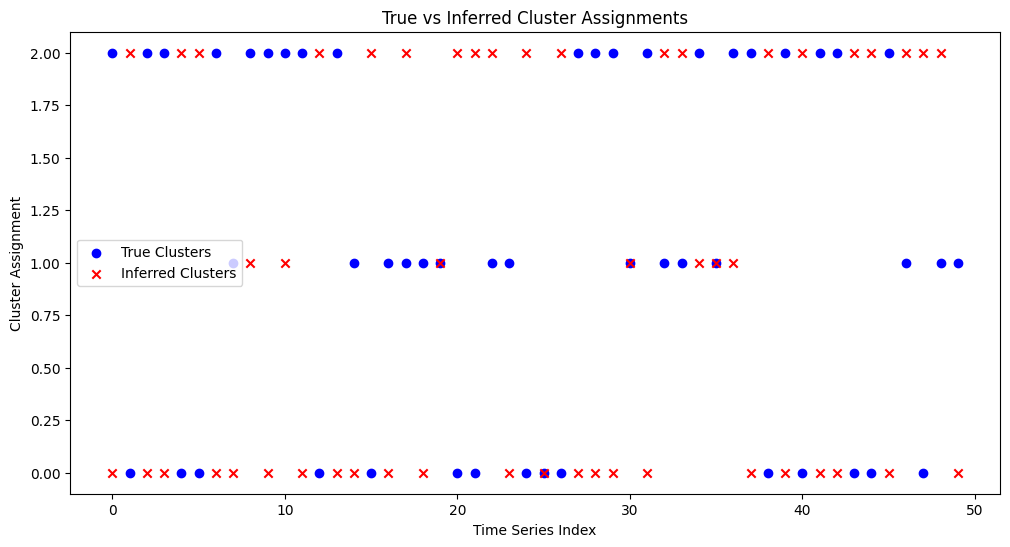

In [9]:
# Print the true and inferred cluster assignments
print("\nCluster Assignments:")
print(f"{'Index':<10}{'True Cluster':<15}{'Inferred Cluster':<15}")
print("-" * 40)
for i in range(N):
    print(f"{i:<10}{clusters_true[i]:<15}{inferred_clusters[i]:<15}")

plt.figure(figsize=(12, 6))
plt.scatter(range(N), clusters_true, color='blue', label='True Clusters')
plt.scatter(range(N), inferred_clusters, color='red', marker='x', label='Inferred Clusters')
plt.xlabel('Time Series Index')
plt.ylabel('Cluster Assignment')
plt.title('True vs Inferred Cluster Assignments')
plt.legend()
plt.show()

Z_estimated range: 0.1875 to 0.78


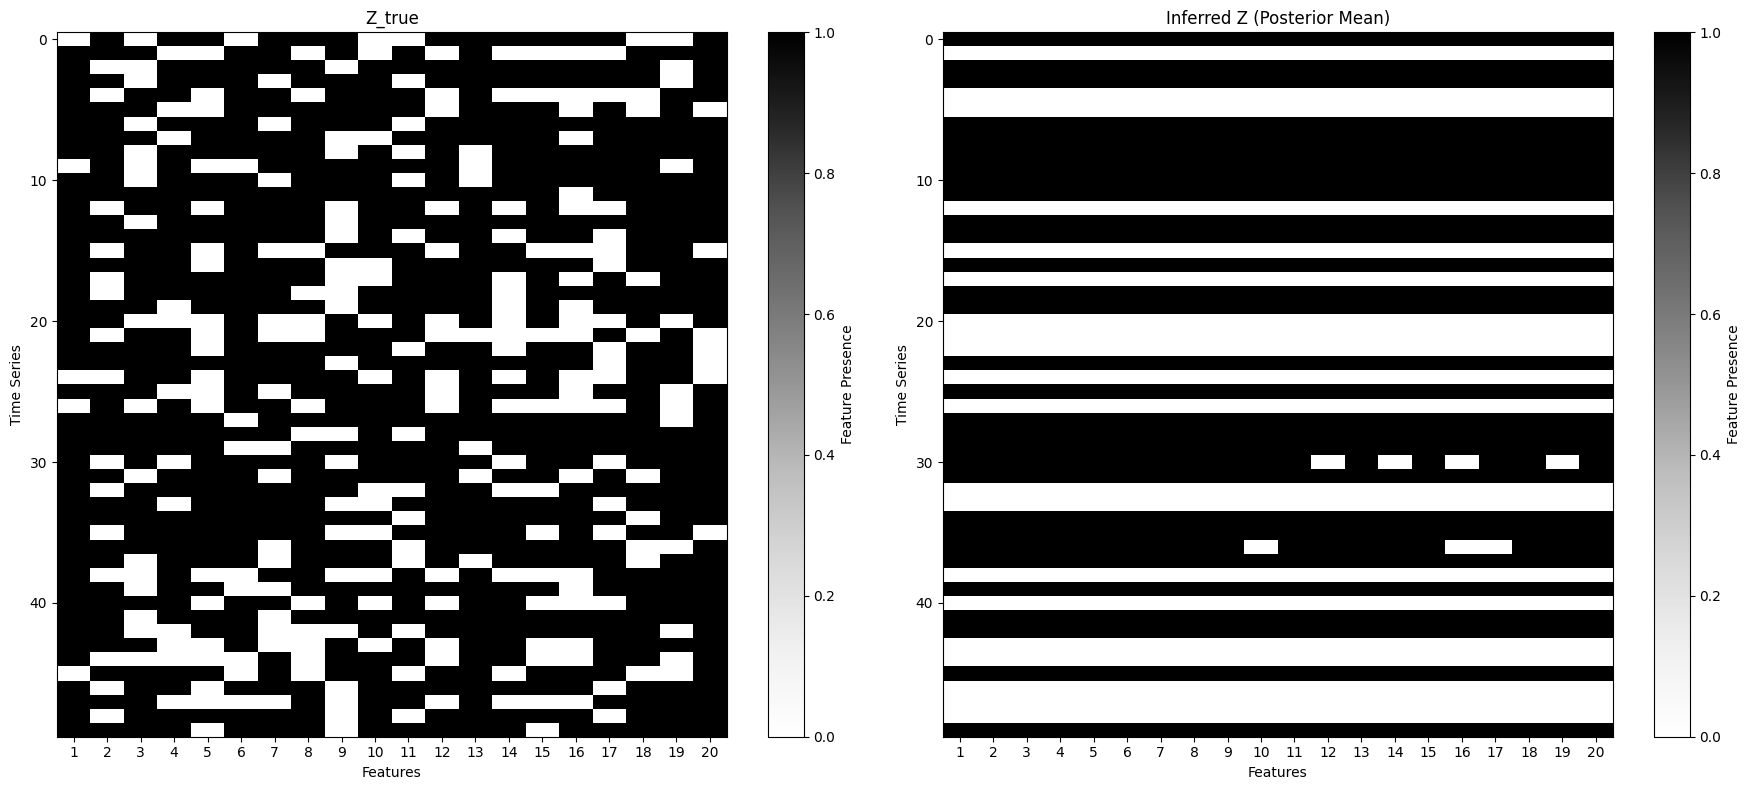

In [ ]:
# Extract posterior mean of Z
Z_estimated = trace_joint_model.posterior['Z'].mean(dim=['chain', 'draw']).values
print(f"Z_estimated range: {Z_estimated.min()} to {Z_estimated.max()}")

# Convert to binary (threshold at 0.5)
Z_posterior_mean = (Z_estimated > 0.5).astype(int)

# Plotting Z_true vs Z_estimated
plt.figure(figsize=(18, 8))

# Plotting Z_true
plt.subplot(1, 2, 1)
plt.imshow(Z_true, aspect='auto', cmap='Greys', interpolation='none')
plt.title('Z_true')
plt.xlabel('Features')
plt.ylabel('Time Series')
plt.colorbar(label='Feature Presence')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

# Plotting Z_posterior_mean
plt.subplot(1, 2, 2)
plt.imshow(Z_posterior_mean, aspect='auto', cmap='Greys', interpolation='none')
plt.title('Inferred Z (Posterior Mean)')
plt.xlabel('Features')
plt.ylabel('Time Series')
plt.colorbar(label='Feature Presence')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

plt.tight_layout()
plt.show()


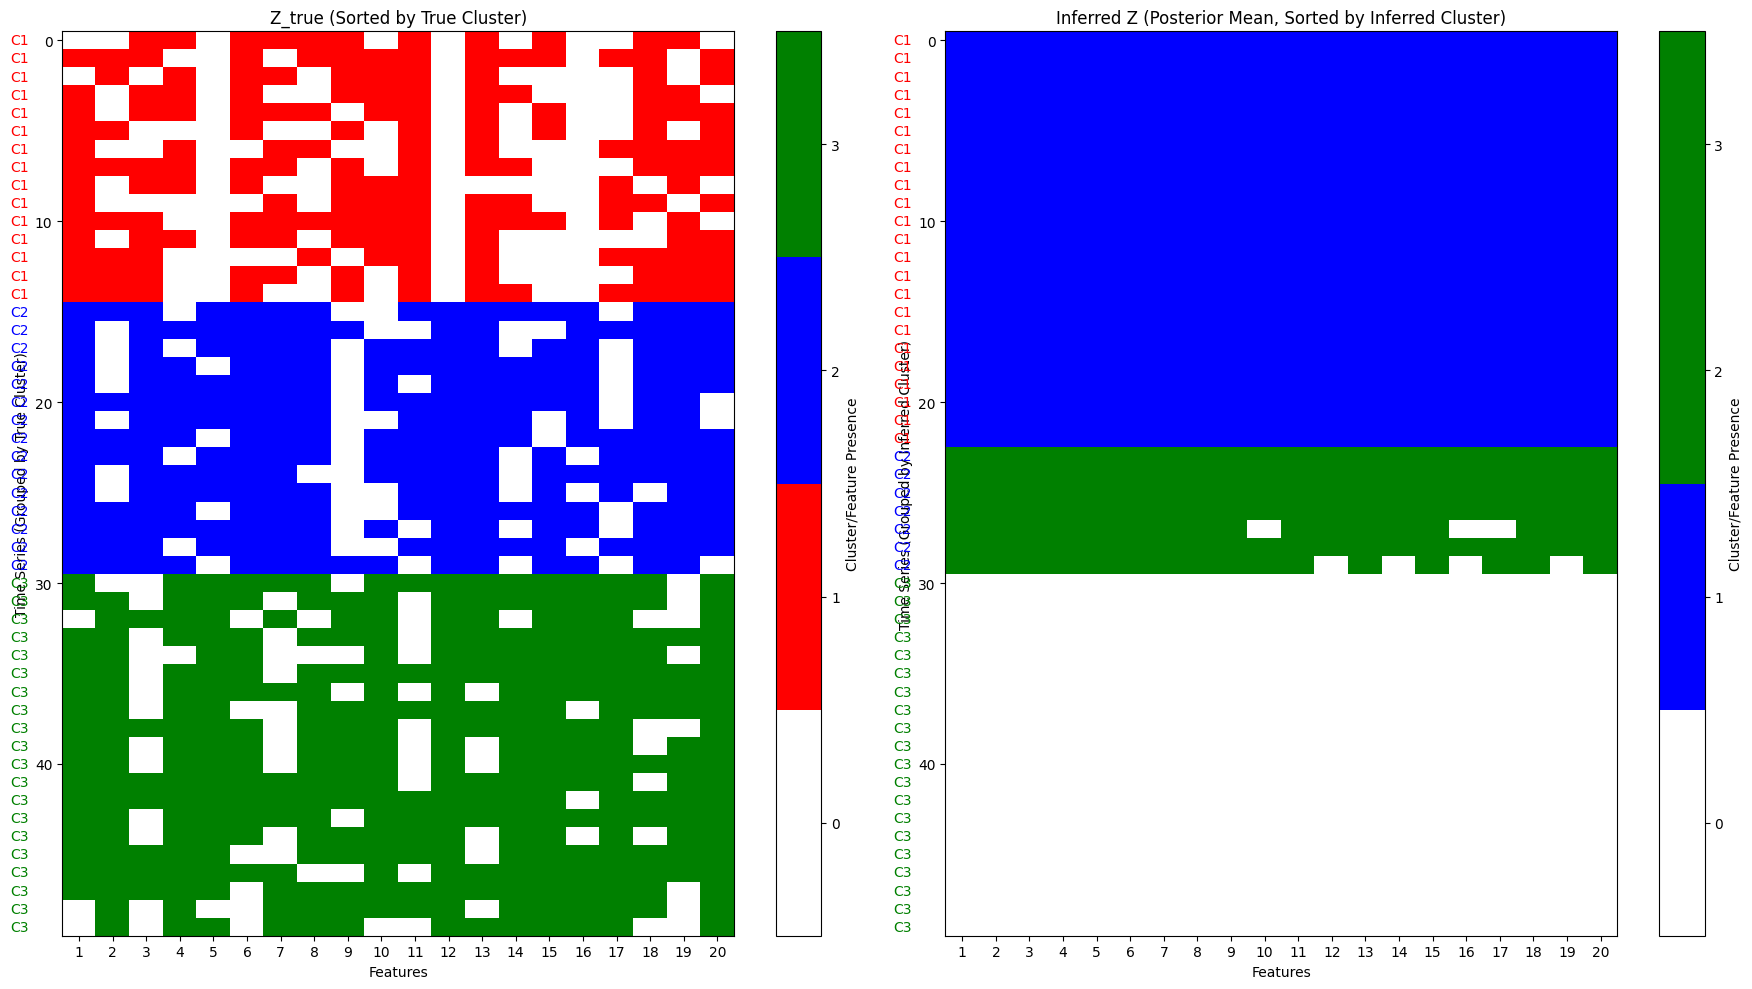

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# --- Sort Time Series by True Clusters ---
# Sort indices based on true cluster assignments for better visualization of Z_true
sorted_indices_true = np.argsort(clusters_true)
Z_true_sorted = Z_true[sorted_indices_true]
clusters_true_sorted = clusters_true[sorted_indices_true]

# --- Sort Time Series by Inferred Clusters ---
# Sort indices based on inferred cluster assignments for better visualization of inferred Z
sorted_indices_inferred = np.argsort(inferred_clusters)
Z_posterior_mean_sorted = Z_posterior_mean[sorted_indices_inferred]
clusters_inferred_sorted = inferred_clusters[sorted_indices_inferred]

# Assign distinct colors to each cluster for visualization
cluster_colors = ['red', 'blue', 'green']  # Assign a distinct color for each cluster
color_map = mcolors.ListedColormap(['white'] + cluster_colors)  # White for inactive (0), cluster colors for activated features

# Create an array of colors matching the activation states and cluster colors for Z_true and Z_posterior_mean
activation_colors_true = np.zeros(Z_true_sorted.shape, dtype=int)
activation_colors_estimated = np.zeros(Z_posterior_mean_sorted.shape, dtype=int)

# Assign colors to activated features based on cluster assignments
for i, cluster_id in enumerate(clusters_true_sorted):
    activation_colors_true[i, Z_true_sorted[i] == 1] = cluster_id + 1  # `+1` to align with color_map indexing
for i, cluster_id in enumerate(clusters_inferred_sorted):
    activation_colors_estimated[i, Z_posterior_mean_sorted[i] == 1] = cluster_id + 1

# Plotting the true and estimated feature allocation matrices
plt.figure(figsize=(18, 10))

# Plotting Z_true_sorted with cluster colors (True Z)
plt.subplot(1, 2, 1)
plt.imshow(activation_colors_true, aspect='auto', cmap=color_map, interpolation='none')
plt.title('Z_true (Sorted by True Cluster)')
plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by True Cluster)')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))
plt.colorbar(ticks=np.arange(4), label='Cluster/Feature Presence', boundaries=np.arange(-0.5, 4.5, 1),
             values=[0, 1, 2, 3], format='%d', cmap=color_map)

# Add colored annotations for true clusters on the left-hand side of Z_true
for i in range(N):
    cluster_label = f"C{clusters_true_sorted[i] + 1}"
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_colors[clusters_true_sorted[i]], fontsize=10)

# Plotting Z_posterior_mean_sorted with inferred cluster colors
plt.subplot(1, 2, 2)
plt.imshow(activation_colors_estimated, aspect='auto', cmap=color_map, interpolation='none')
plt.title('Inferred Z (Posterior Mean, Sorted by Inferred Cluster)')
plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by Inferred Cluster)')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))
plt.colorbar(ticks=np.arange(4), label='Cluster/Feature Presence', boundaries=np.arange(-0.5, 4.5, 1),
             values=[0, 1, 2, 3], format='%d', cmap=color_map)

# Add colored annotations for inferred clusters on the left-hand side of inferred Z
for i in range(N):
    cluster_label = f"C{clusters_inferred_sorted[i] + 1}"
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_colors[clusters_inferred_sorted[i]], fontsize=10)

plt.tight_layout()
plt.show()


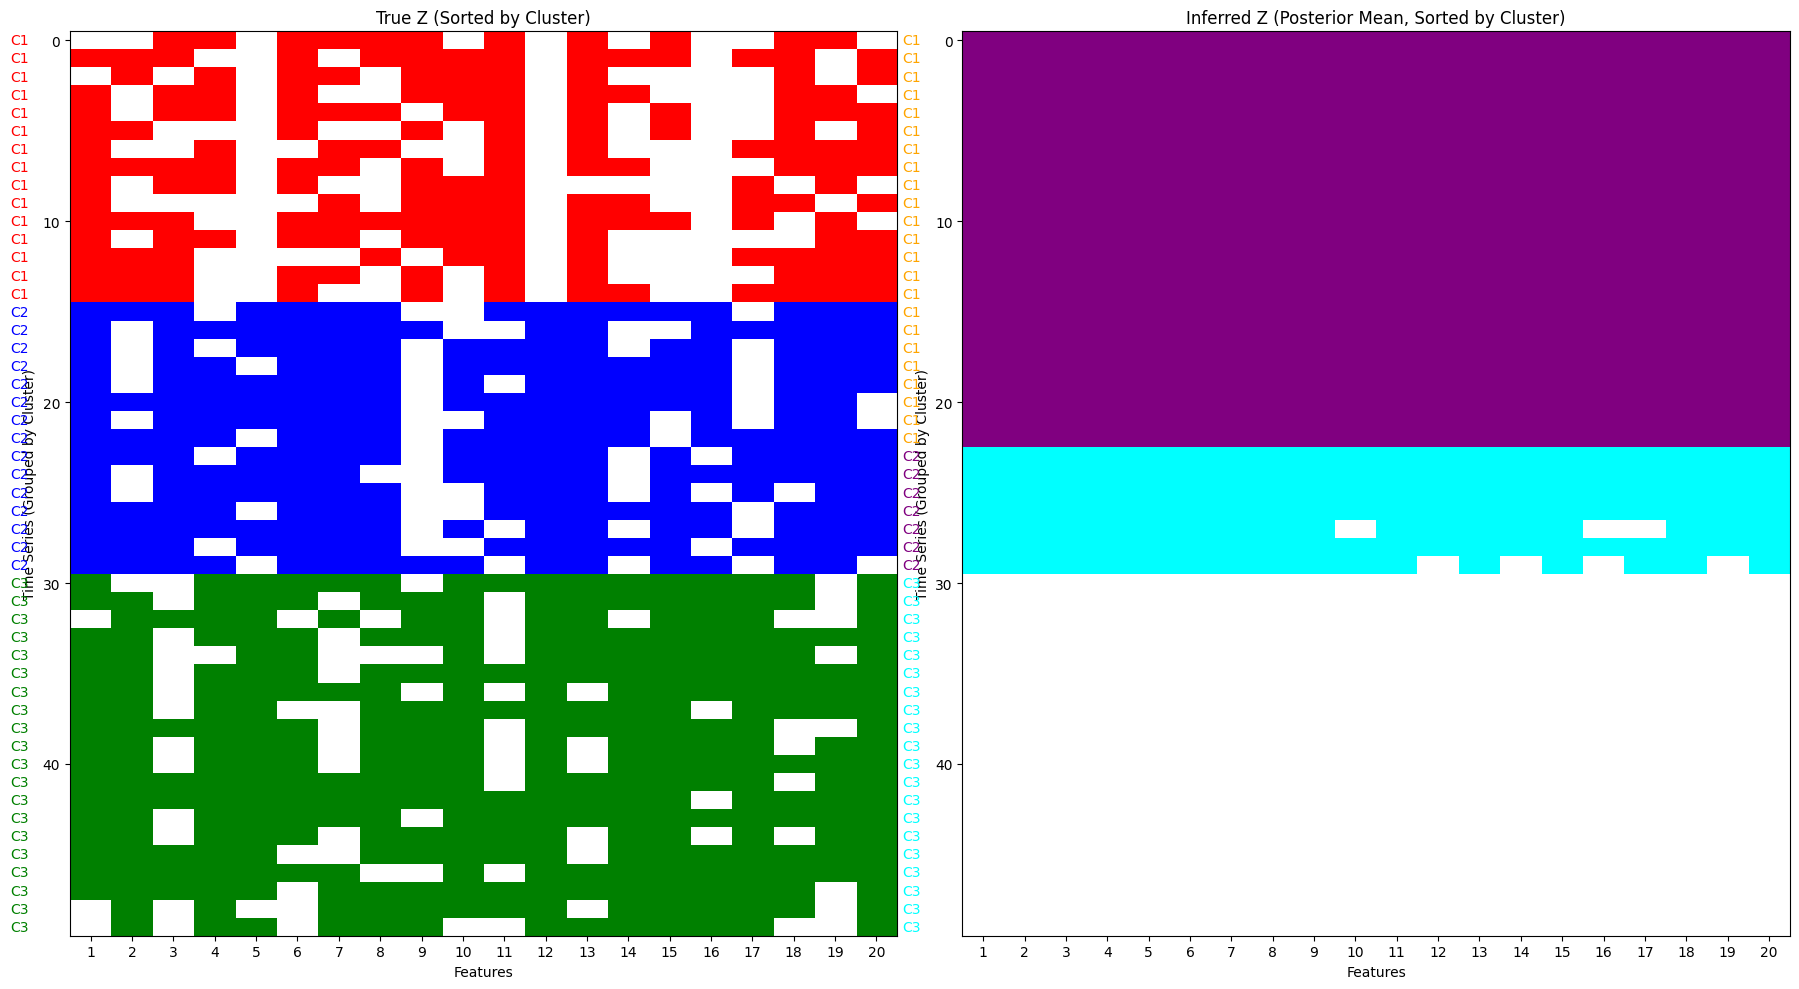

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# --- Sorting and color alignment ---
# Sort the true and inferred matrices by cluster
sorted_indices_true = np.argsort(clusters_true)
sorted_indices_inferred = np.argsort(inferred_clusters)

Z_true_sorted = Z_true[sorted_indices_true]
Z_posterior_mean_sorted = Z_posterior_mean[sorted_indices_inferred]
clusters_sorted_true = clusters_true[sorted_indices_true]
clusters_sorted_inferred = inferred_clusters[sorted_indices_inferred]

# --- Color Mapping ---
# Colors for clusters (True vs Inferred, mutually exclusive)
cluster_colors_true = ['red', 'blue', 'green']  # Assign distinct colors for true clusters
cluster_colors_inferred = ['orange', 'purple', 'cyan']  # Distinct colors for inferred clusters

# Color maps
color_map_true = mcolors.ListedColormap(['white'] + cluster_colors_true)  # White for inactive, color for active features (true)
color_map_inferred = mcolors.ListedColormap(['white'] + cluster_colors_inferred)  # White for inactive, color for active features (inferred)

# Create arrays for feature activation colors
activation_colors_true = np.zeros(Z_true_sorted.shape, dtype=int)
activation_colors_estimated = np.zeros(Z_posterior_mean_sorted.shape, dtype=int)

# Assign colors to activated features based on true cluster assignments
for i, cluster_id in enumerate(clusters_sorted_true):
    activation_colors_true[i, Z_true_sorted[i] == 1] = cluster_id + 1  # Cluster colors for activated features

# Assign colors to activated features based on inferred cluster assignments
for i, cluster_id in enumerate(clusters_sorted_inferred):
    activation_colors_estimated[i, Z_posterior_mean_sorted[i] == 1] = cluster_id + 1  # Cluster colors for activated features

# --- Plotting ---
plt.figure(figsize=(18, 10))

# Plotting Z_true_sorted (True Clusters) with their respective colors
plt.subplot(1, 2, 1)
plt.imshow(activation_colors_true, aspect='auto', cmap=color_map_true, interpolation='none')
plt.title('True Z (Sorted by Cluster)')
plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by Cluster)')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

# Add colored annotations for clusters on the left side (true clusters)
for i in range(N):
    cluster_label = f"C{clusters_sorted_true[i] + 1}"  # True clusters with incremented ID
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_colors_true[clusters_sorted_true[i]], fontsize=10)

# Plotting Z_posterior_mean_sorted (Inferred Clusters) with their respective colors
plt.subplot(1, 2, 2)
plt.imshow(activation_colors_estimated, aspect='auto', cmap=color_map_inferred, interpolation='none')
plt.title('Inferred Z (Posterior Mean, Sorted by Cluster)')
plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by Cluster)')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

# Add colored annotations for clusters on the left side (inferred clusters)
for i in range(N):
    cluster_label = f"C{clusters_sorted_inferred[i] + 1}"  # Inferred clusters with incremented ID
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_colors_inferred[clusters_sorted_inferred[i]], fontsize=10)

# --- Adjusting the legend and colorbars ---
# Since the clusters are distinct, we will not add a traditional legend but will allow colorbars
# Each cluster's color will represent activated features for the respective Z matrix (true or inferred).

plt.tight_layout()
plt.show()


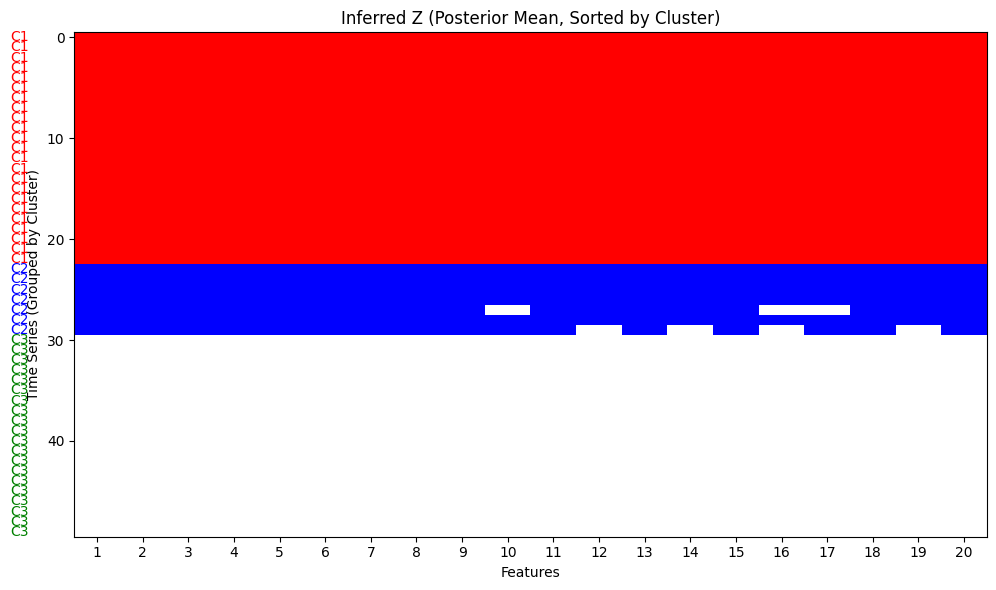


Sorted Z_true Matrix with Cluster Assignments:
Time Series 1 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 2 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 3 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 4 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 5 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 6 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 7 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 8 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 9 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 10 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 11 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 12 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 13 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Time Series 14 (Cluster 1): [1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# --- Manually Define Colors for Clusters ---
# Define the manual color for each cluster (for the labels on the y-axis)
cluster_label_colors = {
    0: 'red',  # Cluster 1 (C1) label color
    1: 'blue',  # Cluster 2 (C2) label color
    2: 'green'     # Cluster 3 (C3) label color
}

# Define the manual color for each cluster (for the activated features in the plot)
cluster_activation_colors = {
    0: 'red',  # Color for activated features of Cluster 1 (C1)
    1: 'blue',  # Color for activated features of Cluster 2 (C2)
    2: 'purple'     # Color for activated features of Cluster 3 (C3)
}

# --- Sorting and color alignment ---
# Sort the inferred matrix by clusters and activate features
sorted_indices_inferred = np.argsort(inferred_clusters)
Z_posterior_mean_sorted = Z_posterior_mean[sorted_indices_inferred]
clusters_sorted_inferred = inferred_clusters[sorted_indices_inferred]

# --- Color Map for Plot ---
# Create a color map for the clusters (activate features)
color_map_inferred = mcolors.ListedColormap(['white', 'blue', 'red', 'blue'])  # White for inactive, cluster colors for activated features

# Create an array for feature activation colors for the inferred Z matrix
activation_colors_estimated = np.zeros(Z_posterior_mean_sorted.shape, dtype=int)

# Assign colors to activated features based on manually defined colors for clusters
for i, cluster_id in enumerate(clusters_sorted_inferred):
    activation_colors_estimated[i, Z_posterior_mean_sorted[i] == 1] = cluster_id + 1  # +1 to match color map indexing

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plotting Z_posterior_mean_sorted (Inferred Clusters) with their respective colors
plt.imshow(activation_colors_estimated, aspect='auto', cmap=color_map_inferred, interpolation='none')
plt.title('Inferred Z (Posterior Mean, Sorted by Cluster)')
plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by Cluster)')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

# Add manually defined colored annotations for clusters on the left side (inferred clusters)
for i in range(N):
    cluster_id = clusters_sorted_inferred[i]
    cluster_label = f"C{cluster_id + 1}"  # Cluster labels (C1, C2, C3)
    cluster_color = cluster_label_colors[cluster_id]  # Manually assign color to cluster label
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_color, fontsize=10)

plt.tight_layout()
plt.show()

# --- Print the Sorted Z_true Matrix for Interpretation ---
print("\nSorted Z_true Matrix with Cluster Assignments:")
for i, (cluster_id, z_row) in enumerate(zip(clusters_sorted_inferred, Z_posterior_mean_sorted)):
    print(f"Time Series {i + 1} (Cluster {cluster_id + 1}): {z_row}")


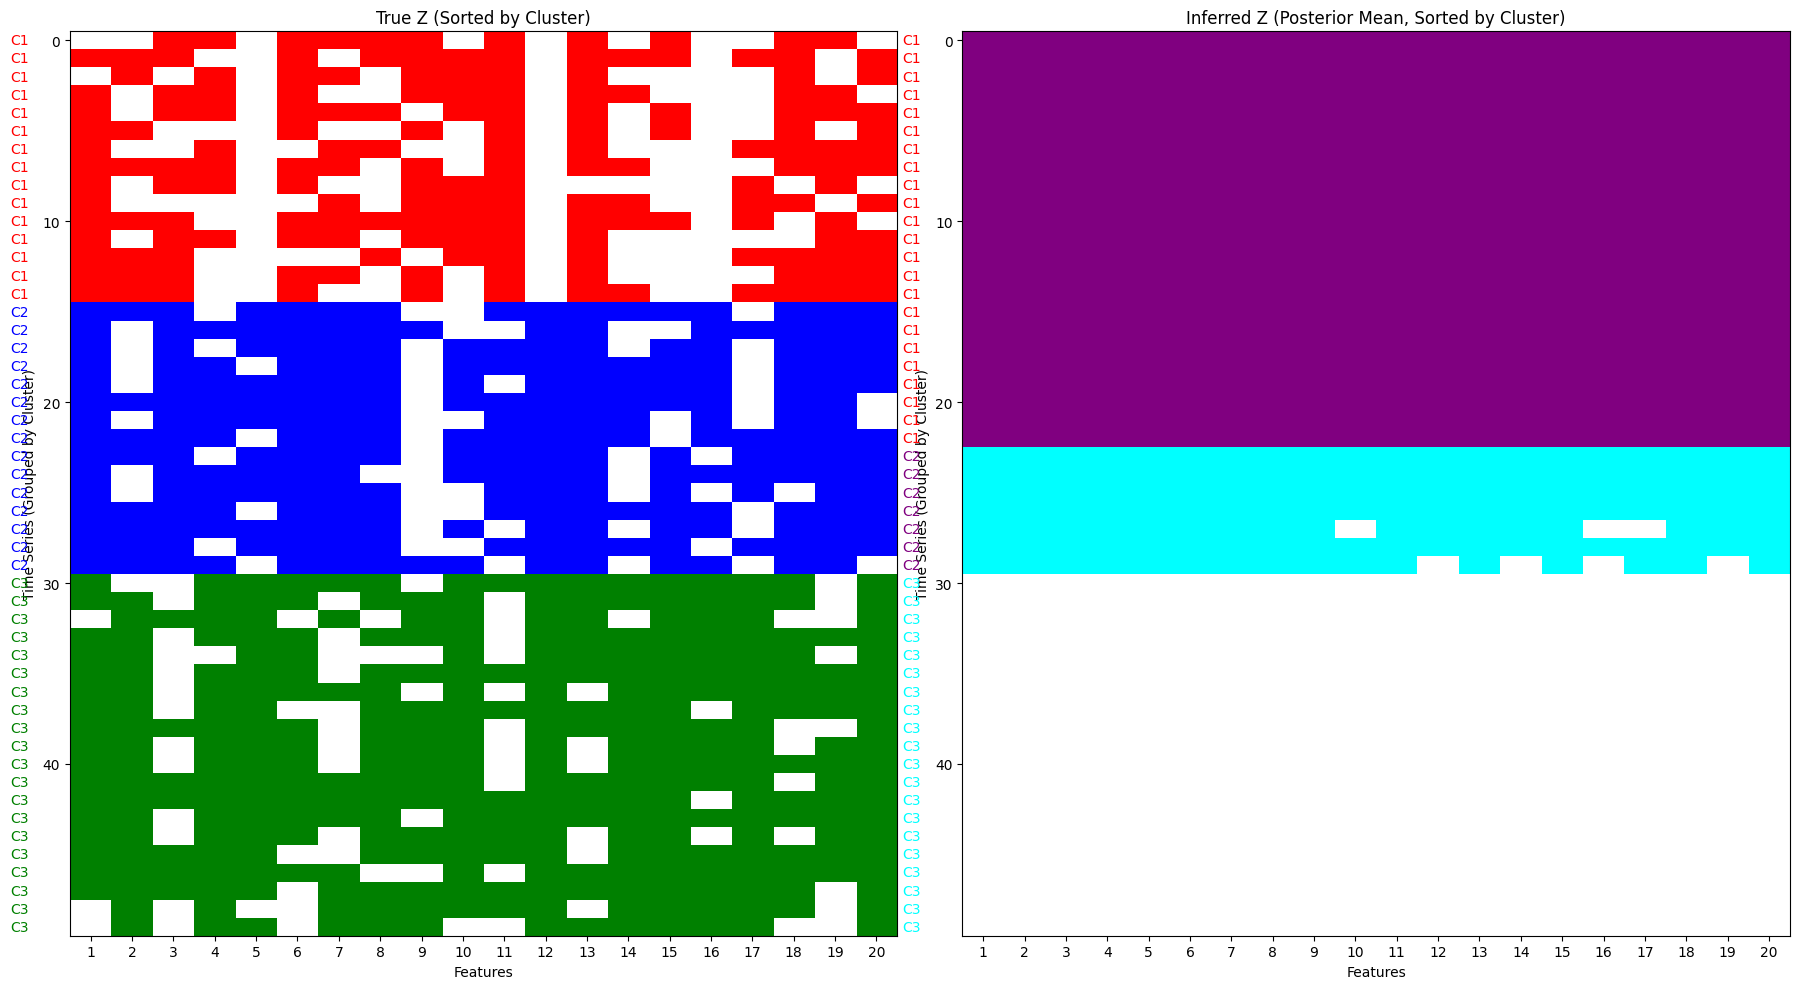

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# --- Manually Define Colors for Clusters ---
# Define the manual color for each cluster (for the labels on the y-axis)
cluster_label_colors = {
    0: 'red',  # Cluster 1 (C1) label color
    1: 'blue',  # Cluster 2 (C2) label color
    2: 'green'     # Cluster 3 (C3) label color
}

# Define the manual color for each cluster (for the activated features in the plot)
cluster_activation_colors = {
    0: 'red',  # Color for activated features of Cluster 1 (C1)
    1: 'blue',  # Color for activated features of Cluster 2 (C2)
    2: 'purple'     # Color for activated features of Cluster 3 (C3)
}

# --- Sorting and color alignment ---
# Sort the true and inferred matrices by cluster
sorted_indices_true = np.argsort(clusters_true)
sorted_indices_inferred = np.argsort(inferred_clusters)

Z_true_sorted = Z_true[sorted_indices_true]
Z_posterior_mean_sorted = Z_posterior_mean[sorted_indices_inferred]
clusters_sorted_true = clusters_true[sorted_indices_true]
clusters_sorted_inferred = inferred_clusters[sorted_indices_inferred]

# --- Color Mapping ---
# Colors for clusters (True vs Inferred, mutually exclusive)
cluster_colors_true = ['red', 'blue', 'green']  # Assign distinct colors for true clusters
cluster_colors_inferred = ['red', 'purple', 'cyan']  # Distinct colors for inferred clusters

# Color maps
color_map_true = mcolors.ListedColormap(['white'] + cluster_colors_true)  # White for inactive, color for active features (true)
color_map_inferred = mcolors.ListedColormap(['white'] + cluster_colors_inferred)  # White for inactive, color for active features (inferred)

# Create arrays for feature activation colors
activation_colors_true = np.zeros(Z_true_sorted.shape, dtype=int)
activation_colors_estimated = np.zeros(Z_posterior_mean_sorted.shape, dtype=int)

# Assign colors to activated features based on true cluster assignments
for i, cluster_id in enumerate(clusters_sorted_true):
    activation_colors_true[i, Z_true_sorted[i] == 1] = cluster_id + 1  # Cluster colors for activated features

# Assign colors to activated features based on inferred cluster assignments
for i, cluster_id in enumerate(clusters_sorted_inferred):
    activation_colors_estimated[i, Z_posterior_mean_sorted[i] == 1] = cluster_id + 1  # Cluster colors for activated features

# --- Plotting ---
plt.figure(figsize=(18, 10))

# Plotting Z_true_sorted (True Clusters) with their respective colors
plt.subplot(1, 2, 1)
plt.imshow(activation_colors_true, aspect='auto', cmap=color_map_true, interpolation='none')
plt.title('True Z (Sorted by Cluster)')
plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by Cluster)')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

# Add colored annotations for clusters on the left side (true clusters)
for i in range(N):
    cluster_label = f"C{clusters_sorted_true[i] + 1}"  # True clusters with incremented ID
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_colors_true[clusters_sorted_true[i]], fontsize=10)

# Plotting Z_posterior_mean_sorted (Inferred Clusters) with their respective colors
plt.subplot(1, 2, 2)
plt.imshow(activation_colors_estimated, aspect='auto', cmap=color_map_inferred, interpolation='none')
plt.title('Inferred Z (Posterior Mean, Sorted by Cluster)')
plt.xlabel('Features')
plt.ylabel('Time Series (Grouped by Cluster)')
plt.xticks(ticks=np.arange(K_trunc), labels=np.arange(1, K_trunc + 1))

# Add colored annotations for clusters on the left side (inferred clusters)
for i in range(N):
    cluster_label = f"C{clusters_sorted_inferred[i] + 1}"  # Inferred clusters with incremented ID
    plt.text(-1.5, i, cluster_label, va='center', ha='right', color=cluster_colors_inferred[clusters_sorted_inferred[i]], fontsize=10)

# --- Adjusting the legend and colorbars ---
# Since the clusters are distinct, we will not add a traditional legend but will allow colorbars
# Each cluster's color will represent activated features for the respective Z matrix (true or inferred).

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import jaccard_score

# Compute Jaccard Similarity for each time series
jaccard_scores = []
for i in range(N):
    jaccard = jaccard_score(Z_true[i], Z_posterior_mean[i])
    jaccard_scores.append(jaccard)
    print(f"Time Series {i+1}: Jaccard Similarity = {jaccard:.2f}")

# Summary of Jaccard Scores
print(f"Mean Jaccard Similarity: {np.mean(jaccard_scores):.2f}")
print(f"Median Jaccard Similarity: {np.median(jaccard_scores):.2f}")

Time Series 1: Jaccard Similarity = 0.65
Time Series 2: Jaccard Similarity = 0.00
Time Series 3: Jaccard Similarity = 0.80
Time Series 4: Jaccard Similarity = 0.80
Time Series 5: Jaccard Similarity = 0.00
Time Series 6: Jaccard Similarity = 0.00
Time Series 7: Jaccard Similarity = 0.85
Time Series 8: Jaccard Similarity = 0.80
Time Series 9: Jaccard Similarity = 0.80
Time Series 10: Jaccard Similarity = 0.70
Time Series 11: Jaccard Similarity = 0.80
Time Series 12: Jaccard Similarity = 0.95
Time Series 13: Jaccard Similarity = 0.00
Time Series 14: Jaccard Similarity = 0.90
Time Series 15: Jaccard Similarity = 0.80
Time Series 16: Jaccard Similarity = 0.00
Time Series 17: Jaccard Similarity = 0.80
Time Series 18: Jaccard Similarity = 0.00
Time Series 19: Jaccard Similarity = 0.80
Time Series 20: Jaccard Similarity = 0.80
Time Series 21: Jaccard Similarity = 0.00
Time Series 22: Jaccard Similarity = 0.00
Time Series 23: Jaccard Similarity = 0.00
Time Series 24: Jaccard Similarity = 0.85
T

In [ ]:
# Parameters
N = 50          # Number of time series
T = 100         # Number of time steps
sigma_A = 0.05  # Parameter noise
Q_true = 0.5    # Process noise variance
R_true = 0.5    # Observation noise variance
C_true = 2.0    # Observation coefficient
K_trunc = 20    # Truncation level for IBP
K_max = 10      # Upper bound for clusters in stick-breaking

with pm.Model() as joint_model:
    # --- 1. Dirichlet Process Mixture Model (DPMM) using Stick-Breaking ---
    # Concentration parameter for DP (CRP equivalent)
    alpha_dp = pm.Gamma('alpha_dp', alpha=1.0, beta=1.0)

    # Stick-breaking weights
    beta_sb = pm.Beta('beta_sb', alpha=1.0, beta=alpha_dp, shape=K_max)

    # Compute the remaining stick for each cluster
    stick_remaining = at.concatenate([at.ones(1), at.extra_ops.cumprod(1 - beta_sb[:-1])])

    # Compute mixture weights pi[k] = beta_sb[k] * stick_remaining[k]
    pi = pm.Deterministic('pi', beta_sb * stick_remaining)

    # Ensure that pi sums to 1 by absorbing the remaining stick into the last cluster
    remaining_stick = at.prod(1 - beta_sb)
    pi_corrected = at.set_subtensor(pi[-1], pi[-1] + remaining_stick)
    pi_corrected = pm.Deterministic('pi_corrected', pi_corrected)

    # Cluster assignments
    cluster = pm.Categorical('cluster', p=pi_corrected, shape=N)

    # --- 2. IBP for Latent Feature Allocation ---
    # IBP Hyperparameters
    alpha_p = pm.Gamma('alpha_p', alpha=2.0, beta=1, shape=K_max)
    beta_p = 1 #pm.Gamma('beta_p', alpha=2.0, beta=1.0, shape=K_max)

    scaled_alpha_p = alpha_p #/ K_trunc
    # Cluster-specific feature probabilities with cluster-specific alphas and betas
    feature_probabilities_clusters = pm.Beta('v_clusters',
        alpha=scaled_alpha_p[:, None],  # Shape: (K_max, 1)
        beta=beta_p,    # Scalar beta=1.0
        shape=(K_max, K_trunc)
    )

    # Assign feature probabilities based on cluster
    feature_probs = feature_probabilities_clusters[cluster]  # Shape: (N, K_trunc)

    # Latent Feature Matrix Z with cluster-dependent probabilities
    Z = pm.Bernoulli('Z', p=feature_probs, shape=(N, K_trunc))

    # --- 3. Cluster-Specific Feature Effects ---
    lambda_A_clusters = pm.Normal('lambda_A_clusters', mu=0, sigma=0.2,
                                  shape=(K_max, K_trunc))

    # --- 4. Noise Terms for Parameter Dynamics ---
    sigma_A_p = pm.HalfNormal('sigma_A_p', sigma=0.05)
    epsilon_A = pm.Normal('epsilon_A', mu=0, sigma=sigma_A_p, shape=N)

    # --- 5. Computing theta_A and A_n ---
    theta_A = pm.Deterministic('theta_A',
        (Z * lambda_A_clusters[cluster]).sum(axis=1) + epsilon_A)
    A_n = pm.Deterministic('A_n', at.cos(theta_A))

    # --- 6. Sampling Parameters ---
    C = pm.TruncatedNormal('C', mu=1.0, sigma=2.0, lower=0)
    Q = pm.HalfNormal('Q', sigma=1.0)
    R = pm.HalfNormal('R', sigma=1.0)

    # --- 7. Initial States ---
    x0 = pm.Normal('x0', mu=0, sigma=1.0, shape=N)

    # --- 8. State-Space Model ---
    def state_equation(x_prev, noise_t, A_n):
        return A_n * x_prev + noise_t

    process_noise = pm.Normal('process_noise', mu=0, sigma=Q, shape=(T, N))

    x_states, _ = scan(
        fn=state_equation,
        sequences=process_noise,
        outputs_info=x0,
        non_sequences=A_n,
        n_steps=T
    )

    # --- 9. Observation Equations and Likelihood ---
    y_estimated = C * x_states
    y_estimated = y_estimated.T  # Shape: (N, T)

    Y_obs_model = pm.Normal('Y_obs', mu=y_estimated, sigma=R, observed=y_obs)

Output()

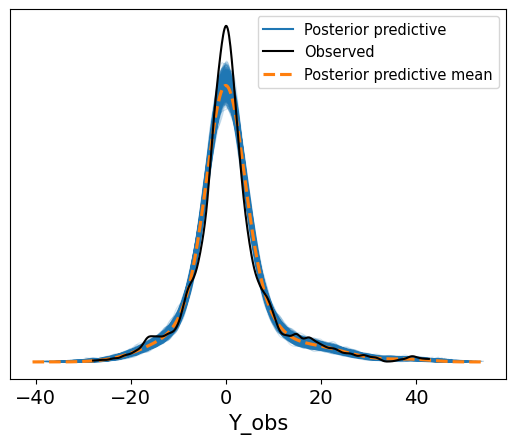

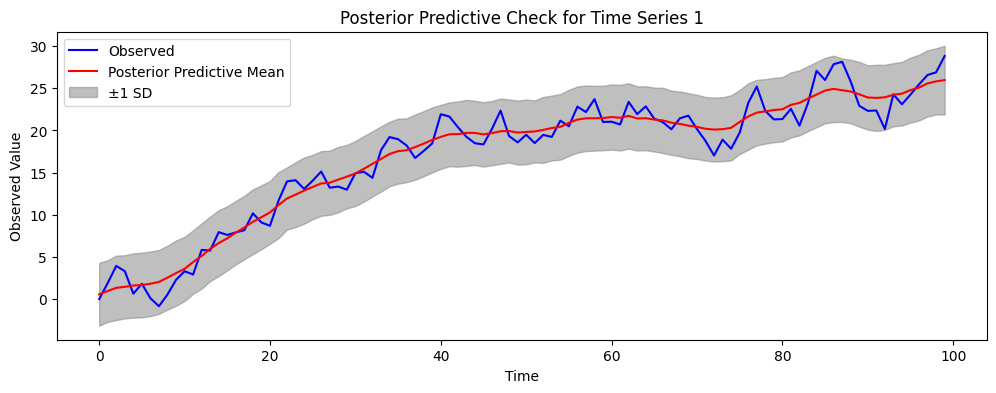

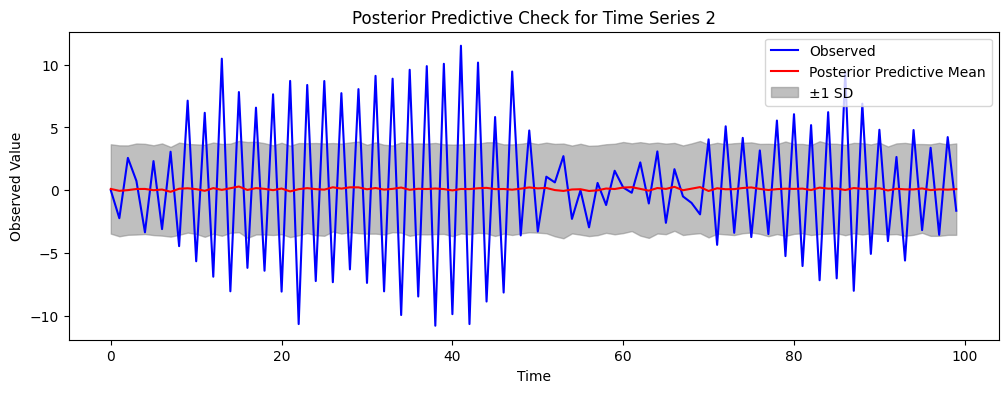

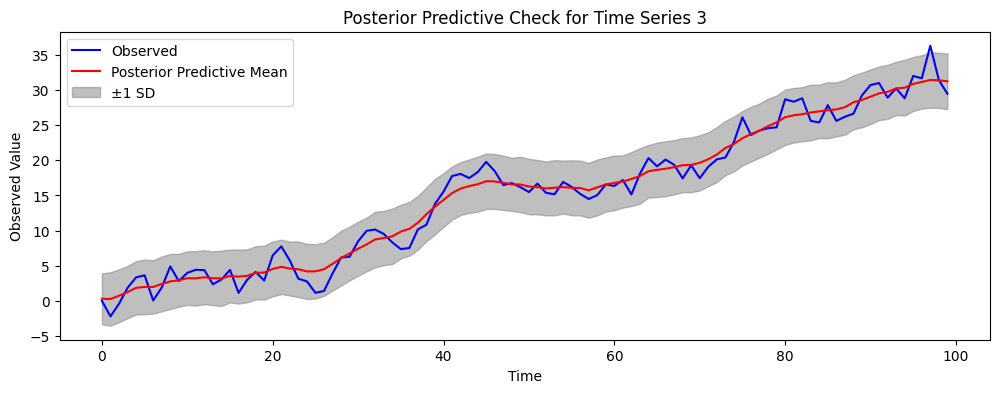

In [ ]:
# Perform Posterior Predictive Checks
with joint_model:
    ppc = pm.sample_posterior_predictive(
        trace_joint_model,
        var_names=['Y_obs'],
        random_seed=123,
        return_inferencedata=True
    )

# Plot Posterior Predictive Checks
az.plot_ppc(ppc)
plt.show()

# Plot PPC for a few time series
num_plot = 3  # Number of time series to plot
for i in range(num_plot):
    plt.figure(figsize=(12, 4))
    plt.plot(y_obs[i], label='Observed', color='blue')
    plt.plot(ppc.posterior_predictive['Y_obs'].mean(dim=['chain', 'draw'])[i],
             label='Posterior Predictive Mean', color='red')
    plt.fill_between(range(T),
                     ppc.posterior_predictive['Y_obs'].mean(dim=['chain', 'draw'])[i] -
                     ppc.posterior_predictive['Y_obs'].std(dim=['chain', 'draw'])[i],
                     ppc.posterior_predictive['Y_obs'].mean(dim=['chain', 'draw'])[i] +
                     ppc.posterior_predictive['Y_obs'].std(dim=['chain', 'draw'])[i],
                     color='gray', alpha=0.5, label='±1 SD')
    plt.xlabel('Time')
    plt.ylabel('Observed Value')
    plt.title(f'Posterior Predictive Check for Time Series {i+1}')
    plt.legend()
    plt.show()


Output()

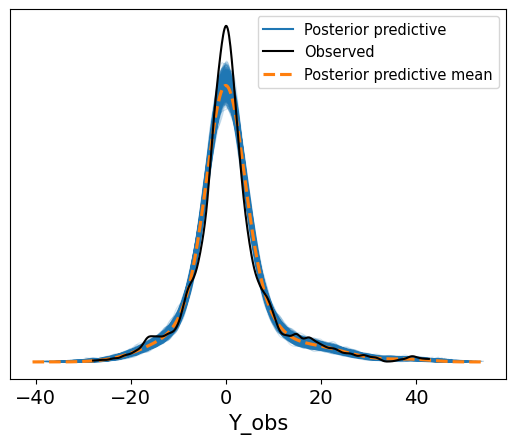

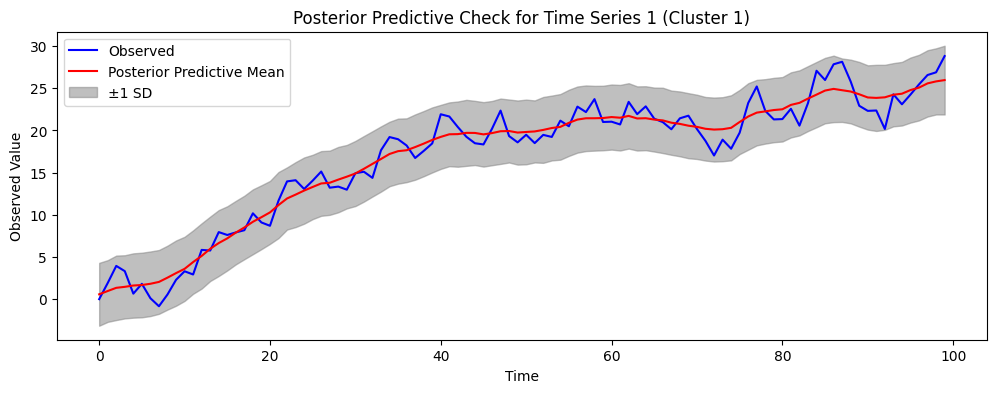

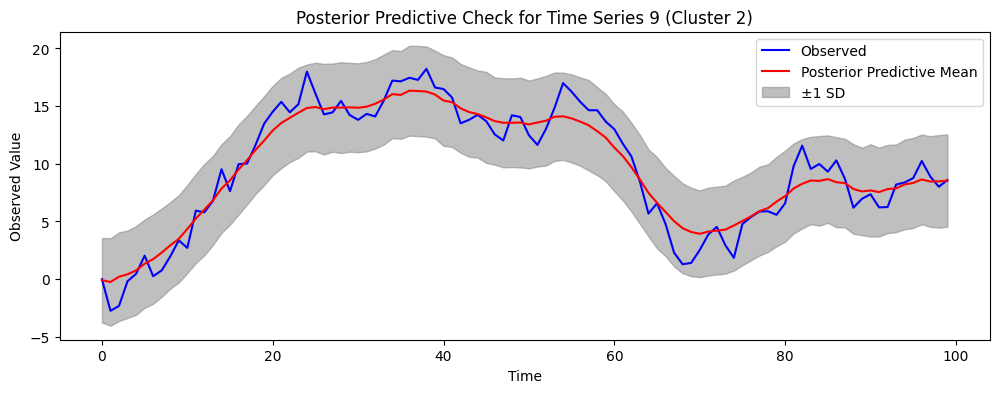

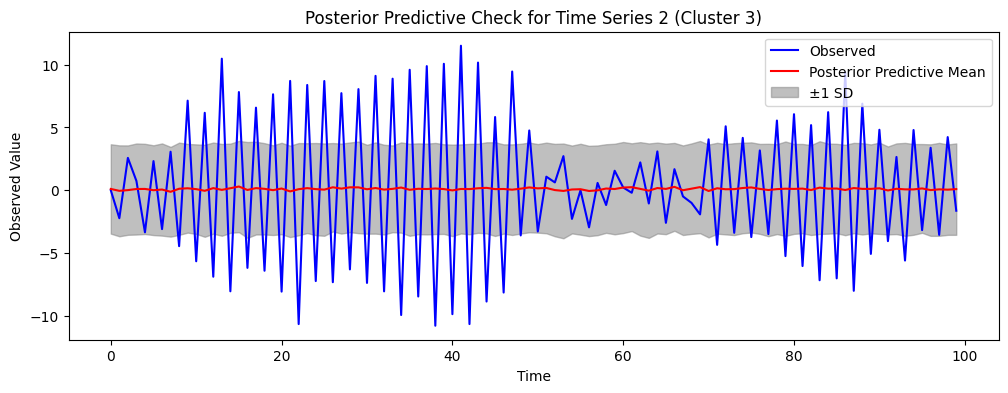

In [ ]:
import numpy as np

# Perform Posterior Predictive Checks
with joint_model:
    ppc = pm.sample_posterior_predictive(
        trace_joint_model,
        var_names=['Y_obs'],
        random_seed=123,
        return_inferencedata=True
    )

# Plot Posterior Predictive Checks
az.plot_ppc(ppc)
plt.show()

# Determine one representative index from each cluster
unique_clusters = np.unique(inferred_clusters)
representative_indices = []

for cluster in unique_clusters:
    # Select one time series from each cluster
    indices = np.where(inferred_clusters == cluster)[0]
    if len(indices) > 0:
        representative_indices.append(indices[0])  # Take the first one as representative

# Plot PPC for a representative of each cluster
for idx in representative_indices:
    plt.figure(figsize=(12, 4))
    plt.plot(y_obs[idx], label='Observed', color='blue')
    plt.plot(ppc.posterior_predictive['Y_obs'].mean(dim=['chain', 'draw'])[idx],
             label='Posterior Predictive Mean', color='red')
    plt.fill_between(range(T),
                     ppc.posterior_predictive['Y_obs'].mean(dim=['chain', 'draw'])[idx] -
                     ppc.posterior_predictive['Y_obs'].std(dim=['chain', 'draw'])[idx],
                     ppc.posterior_predictive['Y_obs'].mean(dim=['chain', 'draw'])[idx] +
                     ppc.posterior_predictive['Y_obs'].std(dim=['chain', 'draw'])[idx],
                     color='gray', alpha=0.5, label='±1 SD')
    plt.xlabel('Time')
    plt.ylabel('Observed Value')
    plt.title(f'Posterior Predictive Check for Time Series {idx + 1} (Cluster {inferred_clusters[idx] + 1})')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract mean from PPC for each time series
ppc_mean = ppc.posterior_predictive['Y_obs'].mean(dim=['chain', 'draw']).values

# Calculate MAE and RMSE for each time series
mae_values = [mean_absolute_error(y_obs[i], ppc_mean[i]) for i in representative_indices]
rmse_values = [np.sqrt(mean_squared_error(y_obs[i], ppc_mean[i])) for i in representative_indices]

# Print MAE and RMSE values
for idx, (mae, rmse) in zip(representative_indices, zip(mae_values, rmse_values)):
    print(f"Time Series {idx + 1} (Cluster {inferred_clusters[idx] + 1}): MAE = {mae:.2f}, RMSE = {rmse:.2f}")

print()

import arviz as az

# Extract relevant metrics using arviz
ppc_summary = az.summary(ppc.posterior_predictive, hdi_prob=0.94)
print(ppc_summary)

import arviz as az
import numpy as np

# Extract the values of the posterior predictive from the ppc InferenceData
ppc_values = ppc.posterior_predictive['Y_obs'].values

# Compute the HDI manually across the chains and draws
hdi_result = az.hdi(ppc_values, hdi_prob=0.94)

# The hdi_result will have two columns: the lower bound (3%) and upper bound (97%) of the HDI
hdi_lower = hdi_result[..., 0]  # 3% HDI bound
hdi_upper = hdi_result[..., 1]  # 97% HDI bound

# Check coverage for each time series in the representative indices
coverage_count = 0
total_count = 0

for idx in representative_indices:
    for t in range(T):
        # Check if the observed value falls within the HDI bounds
        if hdi_lower[idx, t] <= y_obs[idx, t] <= hdi_upper[idx, t]:
            coverage_count += 1
        total_count += 1

# Calculate the coverage probability
coverage_prob = coverage_count / total_count
print(f"Coverage Probability: {coverage_prob:.2f}")



Time Series 1 (Cluster 1): MAE = 1.20, RMSE = 1.47
Time Series 9 (Cluster 2): MAE = 1.06, RMSE = 1.33
Time Series 2 (Cluster 3): MAE = 5.36, RMSE = 6.18

                mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Y_obs[0, 0]    0.577  3.727  -6.003    8.087      0.083    0.059    2010.0   
Y_obs[0, 1]    0.966  3.659  -5.473    8.071      0.082    0.059    1967.0   
Y_obs[0, 2]    1.344  3.821  -5.984    8.341      0.087    0.061    1925.0   
Y_obs[0, 3]    1.461  3.745  -4.901    8.971      0.081    0.059    2150.0   
Y_obs[0, 4]    1.619  3.814  -5.335    8.985      0.087    0.062    1934.0   
...              ...    ...     ...      ...        ...      ...       ...   
Y_obs[49, 95] -3.893  3.852 -11.441    2.719      0.086    0.061    2018.0   
Y_obs[49, 96] -3.649  3.875 -10.890    3.601      0.085    0.061    2093.0   
Y_obs[49, 97] -3.881  3.896 -11.097    3.596      0.083    0.061    2183.0   
Y_obs[49, 98] -3.419  3.886 -10.361    4.064      0.085    0.061  

Cluster 1:
  Feature 1: 0.1281
  Feature 2: 0.1457
  Feature 3: 0.1743
  Feature 4: 0.1624
  Feature 5: 0.1725
  Feature 6: 0.1544
  Feature 7: 0.1589
  Feature 8: 0.1464
  Feature 9: 0.1583
  Feature 10: 0.1401
  Feature 11: 0.1404
  Feature 12: 0.1459
  Feature 13: 0.1564
  Feature 14: 0.1922
  Feature 15: 0.1383
  Feature 16: 0.1693
  Feature 17: 0.1714
  Feature 18: 0.1496
  Feature 19: 0.1686
  Feature 20: 0.1544

Cluster 2:
  Feature 1: -0.0678
  Feature 2: -0.0706
  Feature 3: -0.0531
  Feature 4: -0.1156
  Feature 5: -0.0400
  Feature 6: -0.0726
  Feature 7: -0.0826
  Feature 8: -0.0458
  Feature 9: -0.1517
  Feature 10: -0.1105
  Feature 11: -0.0980
  Feature 12: -0.0926
  Feature 13: -0.0751
  Feature 14: -0.0783
  Feature 15: -0.0761
  Feature 16: -0.0366
  Feature 17: -0.0533
  Feature 18: -0.0839
  Feature 19: -0.0852
  Feature 20: -0.0486

Cluster 3:
  Feature 1: -0.0026
  Feature 2: 0.0980
  Feature 3: 0.0092
  Feature 4: 0.0385
  Feature 5: -0.0195
  Feature 6: -0.0023


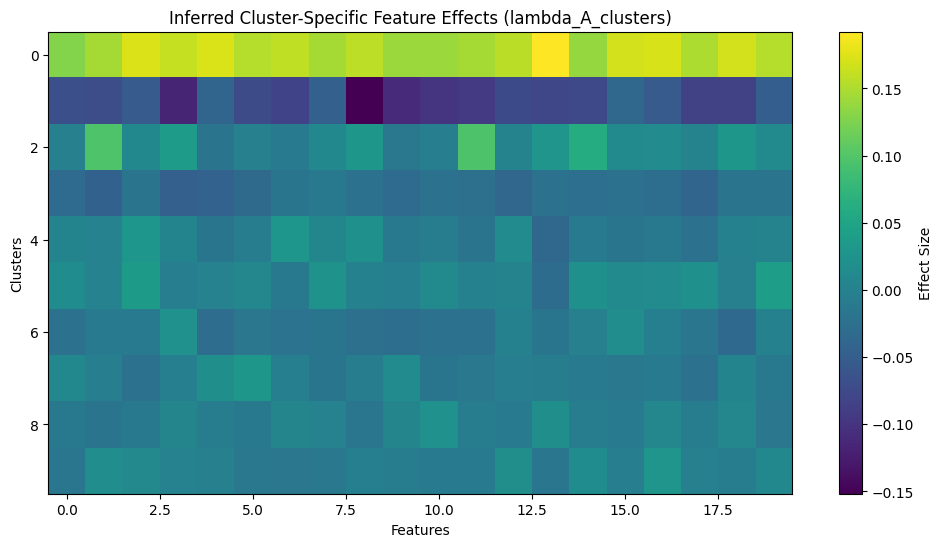

In [ ]:
# Extract posterior mean of lambda_A_clusters
lambda_A_estimated = trace_joint_model.posterior['lambda_A_clusters'].mean(dim=['chain', 'draw']).values

# Print the values for each cluster across different features
num_clusters, num_features = lambda_A_estimated.shape
for cluster_idx in range(num_clusters):
    print(f"Cluster {cluster_idx + 1}:")
    for feature_idx in range(num_features):
        print(f"  Feature {feature_idx + 1}: {lambda_A_estimated[cluster_idx, feature_idx]:.4f}")
    print()  # Add an empty line for readability between clusters

# Plot the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(lambda_A_estimated, aspect='auto', cmap='viridis', interpolation='none')
plt.title('Inferred Cluster-Specific Feature Effects (lambda_A_clusters)')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.colorbar(label='Effect Size')
plt.show()


Cluster 1:
  Feature 1: 0.7189
  Feature 2: 0.7289
  Feature 3: 0.7333
  Feature 4: 0.7299
  Feature 5: 0.7546
  Feature 6: 0.7218
  Feature 7: 0.7437
  Feature 8: 0.7147
  Feature 9: 0.7366
  Feature 10: 0.7080
  Feature 11: 0.7291
  Feature 12: 0.7234
  Feature 13: 0.7405
  Feature 14: 0.7365
  Feature 15: 0.7605
  Feature 16: 0.7255
  Feature 17: 0.7370
  Feature 18: 0.7242
  Feature 19: 0.7463
  Feature 20: 0.7514

Cluster 2:
  Feature 1: 0.5226
  Feature 2: 0.4867
  Feature 3: 0.5636
  Feature 4: 0.5301
  Feature 5: 0.5335
  Feature 6: 0.5376
  Feature 7: 0.4797
  Feature 8: 0.5282
  Feature 9: 0.5778
  Feature 10: 0.5493
  Feature 11: 0.5733
  Feature 12: 0.5149
  Feature 13: 0.5249
  Feature 14: 0.5229
  Feature 15: 0.5237
  Feature 16: 0.5045
  Feature 17: 0.5130
  Feature 18: 0.5620
  Feature 19: 0.5465
  Feature 20: 0.5064

Cluster 3:
  Feature 1: 0.3765
  Feature 2: 0.3701
  Feature 3: 0.3693
  Feature 4: 0.3622
  Feature 5: 0.3547
  Feature 6: 0.3514
  Feature 7: 0.3545
  F

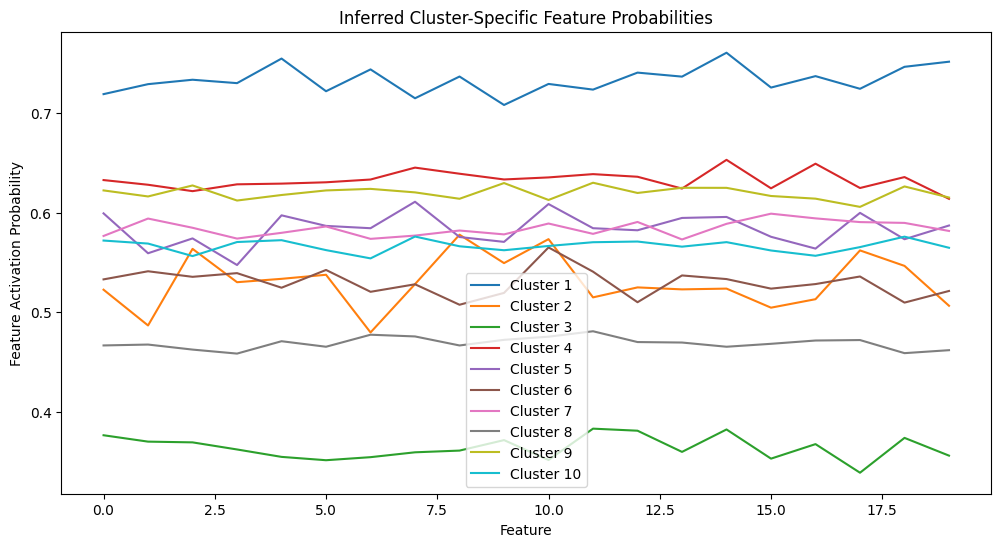

In [ ]:
# Extract posterior mean of feature activation probabilities
feature_probs_estimated = trace_joint_model.posterior['v_clusters'].mean(dim=['chain', 'draw']).values

# Print the estimated feature activation probabilities for each cluster
num_clusters, num_features = feature_probs_estimated.shape
for cluster_idx in range(num_clusters):
    print(f"Cluster {cluster_idx + 1}:")
    for feature_idx in range(num_features):
        print(f"  Feature {feature_idx + 1}: {feature_probs_estimated[cluster_idx, feature_idx]:.4f}")
    print()  # Add an empty line for readability between clusters

# Plot the feature activation probabilities
plt.figure(figsize=(12, 6))
for k in range(num_clusters):
    plt.plot(feature_probs_estimated[k], label=f'Cluster {k + 1}')
plt.xlabel('Feature')
plt.ylabel('Feature Activation Probability')
plt.title('Inferred Cluster-Specific Feature Probabilities')
plt.legend()
plt.show()


In [ ]:
# Extract posterior mean of feature_probabilities_clusters
feature_probabilities_clusters_inferred = trace_joint_model.posterior['v_clusters'].mean(dim=['chain', 'draw']).values
# Shape: (K_max, K_trunc)

# Extract posterior mean of lambda_A_clusters
lambda_A_clusters_inferred = trace_joint_model.posterior['lambda_A_clusters'].mean(dim=['chain', 'draw']).values
# Shape: (K_max, K_trunc)

# Extract posterior mean of C, Q, R, sigma_A_p
C_inferred = trace_joint_model.posterior['C'].mean().item()
Q_inferred = trace_joint_model.posterior['Q'].mean().item()
R_inferred = trace_joint_model.posterior['R'].mean().item()
sigma_A_p_inferred = trace_joint_model.posterior['sigma_A_p'].mean().item()

In [ ]:
import numpy as np

def generate_new_time_series(cluster_id, K_trunc, C, Q, R, lambda_A_clusters, feature_probabilities_clusters, sigma_A_p, T=100):
    """
    Generates a new time series for a specific cluster based on inferred parameters.

    Parameters:
    - cluster_id (int): Cluster identifier.
    - K_trunc (int): Number of latent features.
    - C (float): Observation coefficient.
    - Q (float): Process noise variance.
    - R (float): Observation noise variance.
    - lambda_A_clusters (numpy.ndarray): Inferred feature effects for all clusters. Shape: (K_max, K_trunc)
    - feature_probabilities_clusters (numpy.ndarray): Inferred feature probabilities for all clusters. Shape: (K_max, K_trunc)
    - sigma_A_p (float): Inferred parameter noise.
    - T (int): Number of time steps.

    Returns:
    - y_new (numpy.ndarray): Generated time series data of length T.
    """
    # Sample feature allocations based on cluster-specific probabilities
    feature_probs = feature_probabilities_clusters[cluster_id]  # Shape: (K_trunc,)
    Z_new = (np.random.rand(K_trunc) < feature_probs).astype(int)  # Binary feature vector

    # Sample feature effects for active features
    # Only consider active features (Z_new == 1)
    lambda_A_new = lambda_A_clusters[cluster_id]  # Shape: (K_trunc,)

    # Compute A_n
    epsilon_A_new = np.random.normal(0, np.sqrt(sigma_A_p))  # Noise term
    theta_A_new = np.dot(Z_new, lambda_A_new) + epsilon_A_new
    A_n_new = np.tanh(theta_A_new)

    # Initialize state
    x_new = np.zeros(T)
    x_new[0] = np.random.normal(0, 1)

    # Generate states and observations
    y_new = np.zeros(T)
    y_new[0] = C * x_new[0] + np.random.normal(0, np.sqrt(R))

    for t in range(1, T):
        x_new[t] = A_n_new * x_new[t - 1] + np.random.normal(0, np.sqrt(Q))
        y_new[t] = C * x_new[t] + np.random.normal(0, np.sqrt(R))

    return y_new


Inferred number of clusters: 3


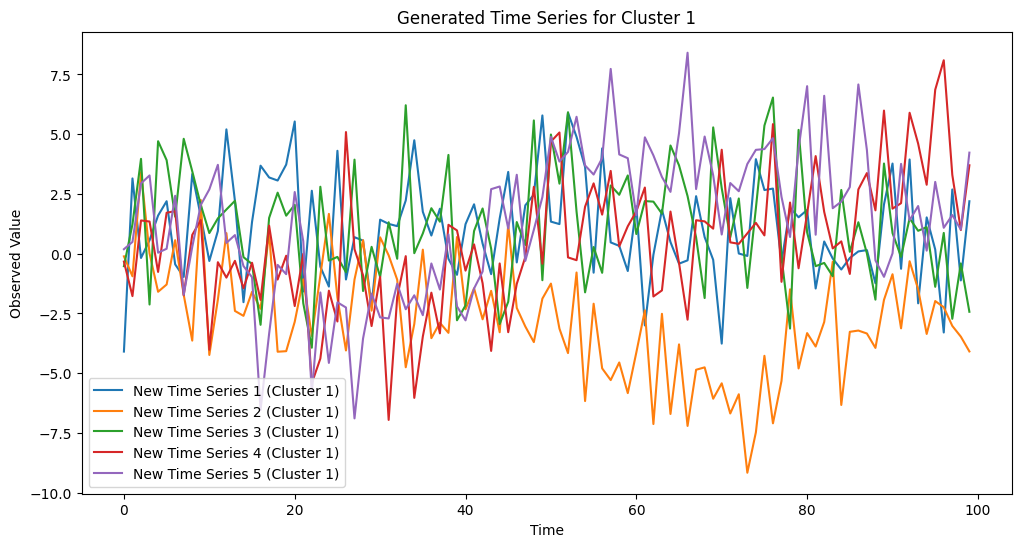

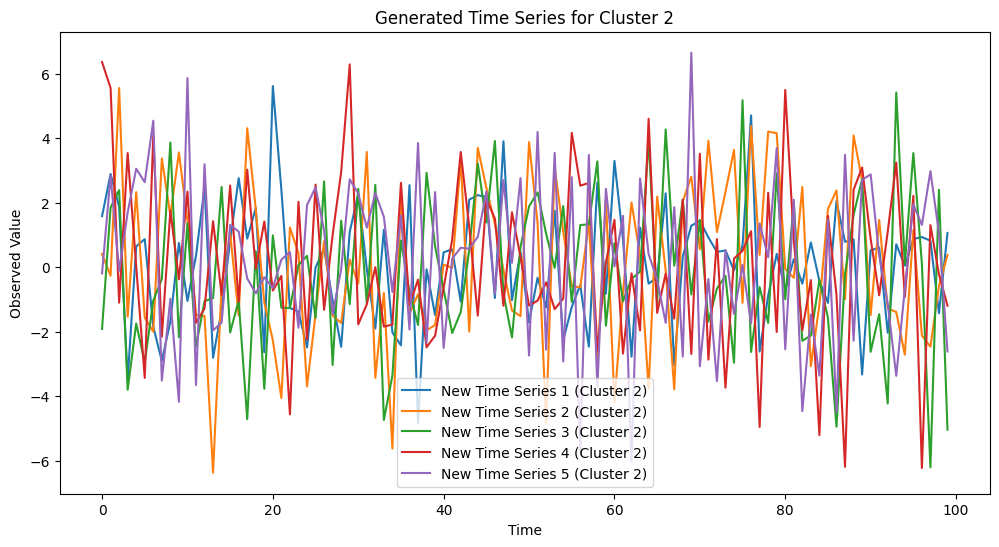

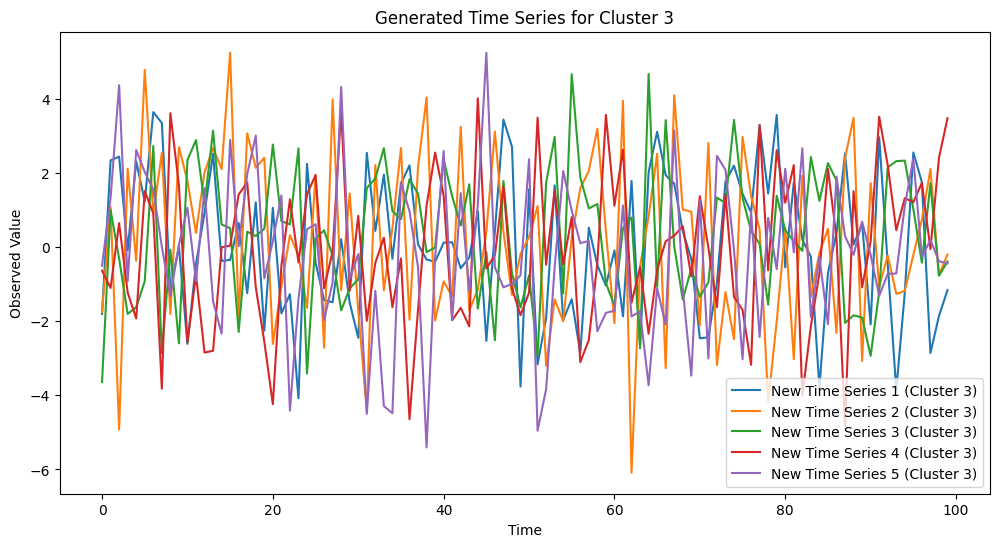

In [ ]:
inferred_num_clusters = len(np.unique(inferred_clusters))
print(f"Inferred number of clusters: {inferred_num_clusters}")

# Define number of new time series per cluster
num_new_per_cluster = 5

# Initialize dictionary to store new time series
new_time_series = {}

for cl in range(inferred_num_clusters):
    new_series = [
        generate_new_time_series(
            cluster_id=cl,
            K_trunc=K_trunc,
            C=C_inferred,
            Q=Q_inferred,
            R=R_inferred,
            lambda_A_clusters=lambda_A_clusters_inferred,
            feature_probabilities_clusters=feature_probabilities_clusters_inferred,
            sigma_A_p=sigma_A_p_inferred,
            T=T
        )
        for _ in range(num_new_per_cluster)
    ]
    new_time_series[cl] = new_series

import matplotlib.pyplot as plt

for cl in range(inferred_num_clusters):
    plt.figure(figsize=(12, 6))
    for i, y_new in enumerate(new_time_series[cl], start=1):
        plt.plot(y_new, label=f'New Time Series {i} (Cluster {cl+1})')
    plt.xlabel('Time')
    plt.ylabel('Observed Value')
    plt.title(f'Generated Time Series for Cluster {cl+1}')
    plt.legend()
    plt.show()
